## Content

01. Importing Libraries
02. Importing Data
03. Investigate the Data Frame
04. Create Customer Profiling
    - Distribution of Customers Based on Age-Group Across U.S. Regions
    - Distribution of Customers Based on Income-Group Across U.S. Regions
    - Distribution of Customers Based on Dependants Across U.S. Regions
    - Number of Orders Based on Department
    - Pie Chart of Royalty Customer Based on Age
    - Pie Chart of New Customer Based on Age
    - Pie Chart of Regular Customer Based on Age
    - Order Based on Hour of Day for Each Age Groups
    - Order Based on Day of Week for Each Age Groups
    - Pie Chart of Royalty Customer Based on Income
    - Pie Chart of New Customer Based on Income
    - Pie Chart of Regular Customer Based on Income
    - Order Based on Hour of Day for Each Income Groups
    - Order Based on Day of Week for Each Income Groups
    - Number of Products Based on Price
    - Pie Chart of Young Customer Purchase Behavior
    - Pie Chart of Middle Age Customer Purchase Behavior
    - Pie Chart of Older Customer Purchase Behavior
    - Pie Chart of High Income Customer Purchase Behavior
    - Pie Chart of Middle Income Customer Purchase Behavior
    - Pie Chart of Low Income Customer Purchase Behavior
    - Distribution of Customers Type Based on Regions
    - Distribution of Customers Type Based on Price Range of Product
    - Distribution of Regional Customers Based on Price Range of Product
05. Export Visualisation
06. Additional Insights

# 01. Importing Libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02. Importing Data

In [2]:
# Import the data set into Jupyter as a new dataframe
path = r'/Users/ChuahLH/Desktop/Documents/Instacart Basket Analysis'

In [3]:
# Import the final merged dataframe
df_merged_2 = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_merged_2.pkl'))

# 03. Investigate the Data Frame

In [4]:
df_merged_2.head(100)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_id,...,gender,state,age,date_joined,number_of_dependants,family_status,income,region,total_orders,Activity_flag
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,195,...,Female,Alabama,31,2/17/2019,3,married,40423,south,59,regular Activity
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,195,...,Female,Alabama,31,2/17/2019,3,married,40423,south,59,regular Activity
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,195,...,Female,Alabama,31,2/17/2019,3,married,40423,south,59,regular Activity
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,195,...,Female,Alabama,31,2/17/2019,3,married,40423,south,59,regular Activity
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,195,...,Female,Alabama,31,2/17/2019,3,married,40423,south,59,regular Activity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3317979,15,5,4,15,17.0,14715.0,1.0,1.0,14715,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,midwest,72,regular Activity
96,2685110,15,7,1,11,17.0,14715.0,3.0,1.0,14715,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,midwest,72,regular Activity
97,887727,15,9,2,13,7.0,14715.0,1.0,1.0,14715,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,midwest,72,regular Activity
98,2600170,15,11,2,9,14.0,14715.0,1.0,1.0,14715,...,Female,Indiana,69,6/3/2019,0,divorced/widowed,54313,midwest,72,regular Activity


In [5]:
df_merged_2.shape

(32403157, 35)

# 04. Create Customer Profiling

Age Group > 18; Age Group < 40 ==> Young Group
Age Group > 40; Age Group < 65 ==> Middle Age Group
Age Group > 65 ==> Older Group

In [6]:
# using .loc to create the customer age group profile
df_merged_2.loc[(df_merged_2['age'] >= 18) & (df_merged_2['age'] < 40), 'age_group'] = 'young'
df_merged_2.loc[(df_merged_2['age'] >= 40) & (df_merged_2['age'] < 65), 'age_group'] = 'middle'
df_merged_2.loc[(df_merged_2['age'] >= 65), 'age_group'] = 'older'
df_merged_2['age_group'].value_counts()

middle    12664994
young     11163563
older      8574600
Name: age_group, dtype: int64

In [7]:
#using cross-tab to understand the customer age groups in each region
age_region = pd.crosstab(df_merged_2['region'], df_merged_2['age_group'].sort_values(ascending=False))
age_region

age_group,middle,older,young
region,,,
midwest,3005237,1990764,2601012
northeast,2209396,1553805,1959266
south,4179660,2836093,3775459
west,3270701,2193938,2827826


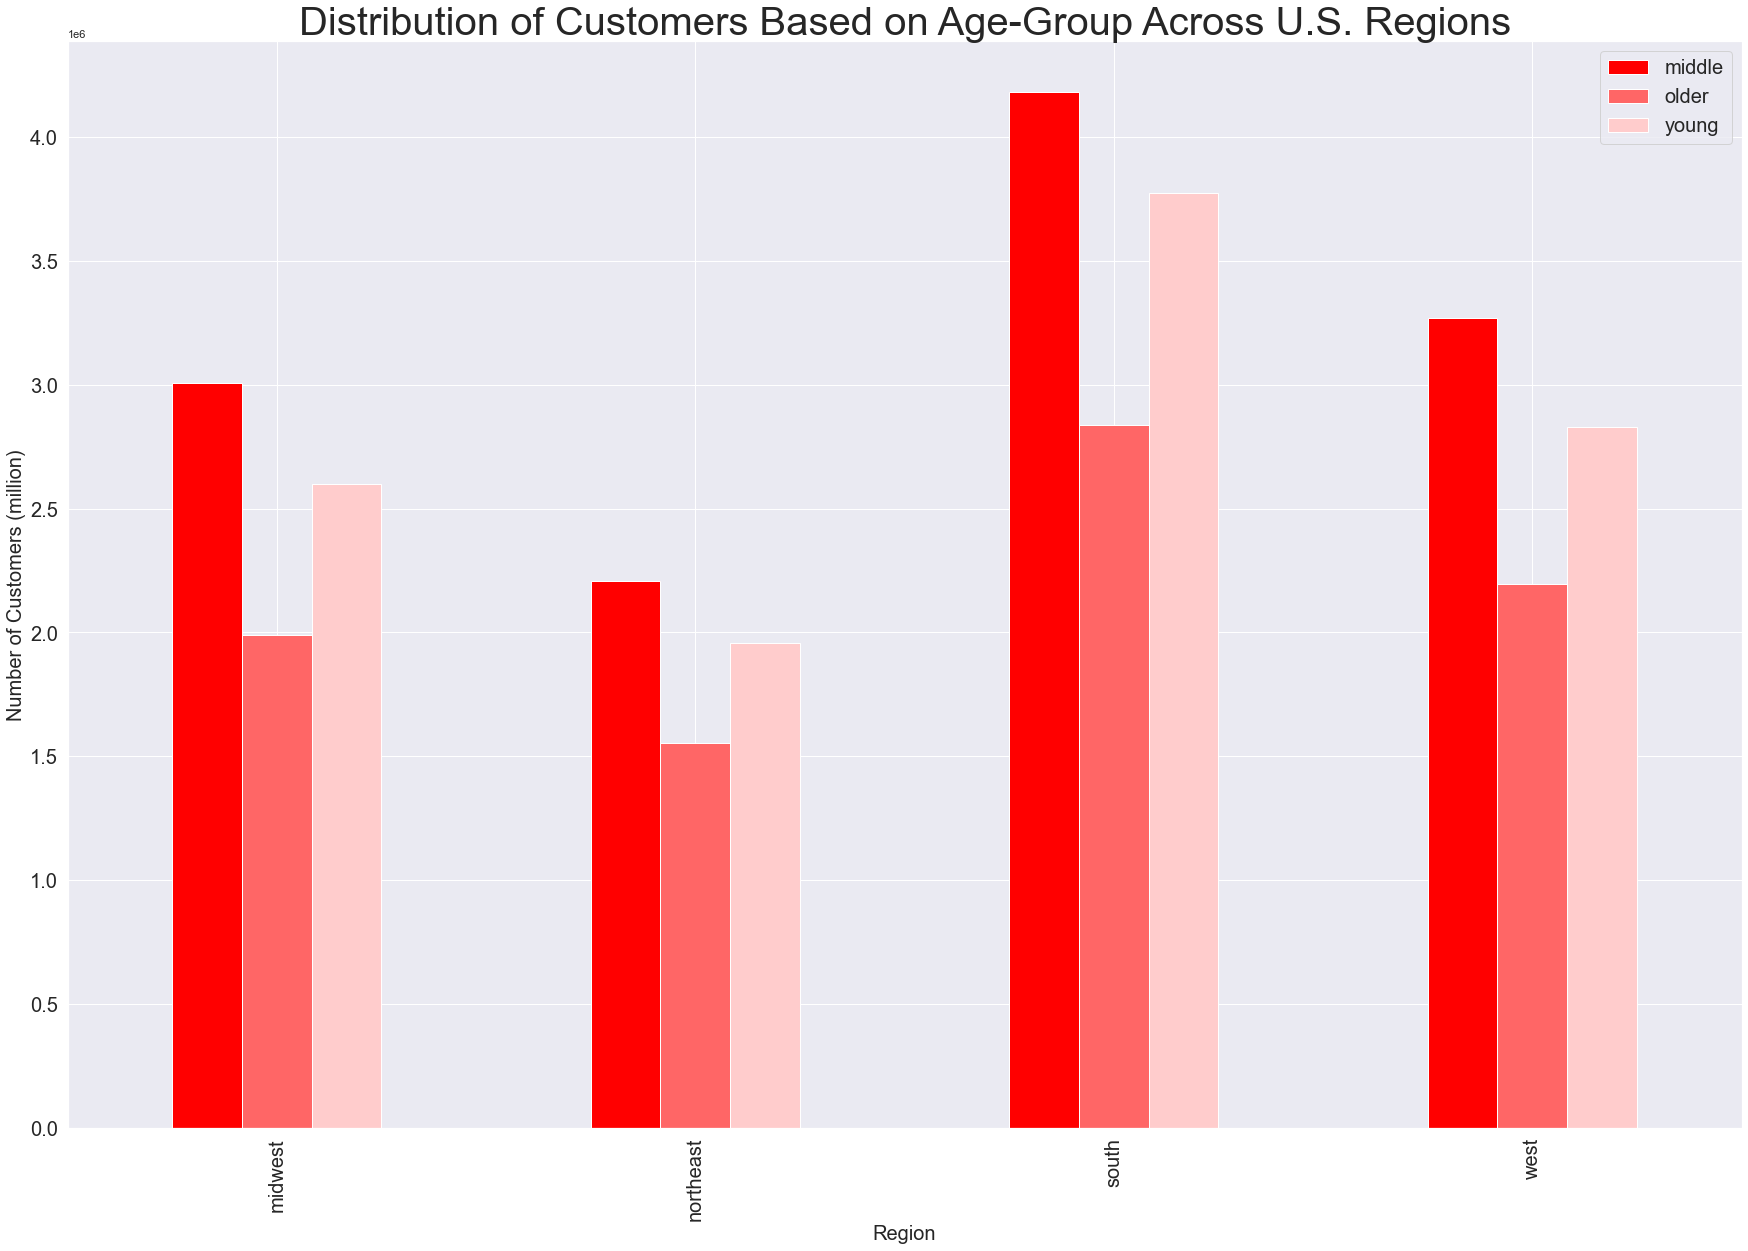

In [10]:
#Setting script figure size to 30,20
sns.set(rc = {'figure.figsize':(30,20)})
# Group bar chart of customer groups based on age-group and regions
bar_age_region=age_region.plot.bar(color=['#ff0000', '#ff6666','#ffcccc'], fontsize=20)
plt.title('Distribution of Customers Based on Age-Group Across U.S. Regions', fontsize=40)
plt.xlabel('Region', fontsize = 20)
plt.ylabel('Number of Customers (million)', fontsize = 20)
plt.legend(fontsize = 20)

Income less than 50000 is lower income; Income in between 50000 and  100000 is middle income and income more than 100000 is high income group

In [11]:
# using .loc to create the customer income group profile
df_merged_2.loc[(df_merged_2['income'] <= 50000), 'income_group'] = 'low income'
df_merged_2.loc[(df_merged_2['income'] > 50000) & (df_merged_2['income'] < 100000), 'income_group'] = 'middle income'
df_merged_2.loc[(df_merged_2['income'] >= 100000), 'income_group'] = 'high income'
df_merged_2['income_group'].value_counts()

high income      14814493
middle income    13995536
low income        3593128
Name: income_group, dtype: int64

In [12]:
#using cross-tab to understand the customer income groups in each region
income_region=pd.crosstab(df_merged_2['region'], df_merged_2['income_group'].sort_values(ascending=False))
income_region

income_group,high income,low income,middle income
region,,,
midwest,3539902,838212,3218899
northeast,2628437,627113,2466917
south,4865729,1219080,4706403
west,3780425,908723,3603317


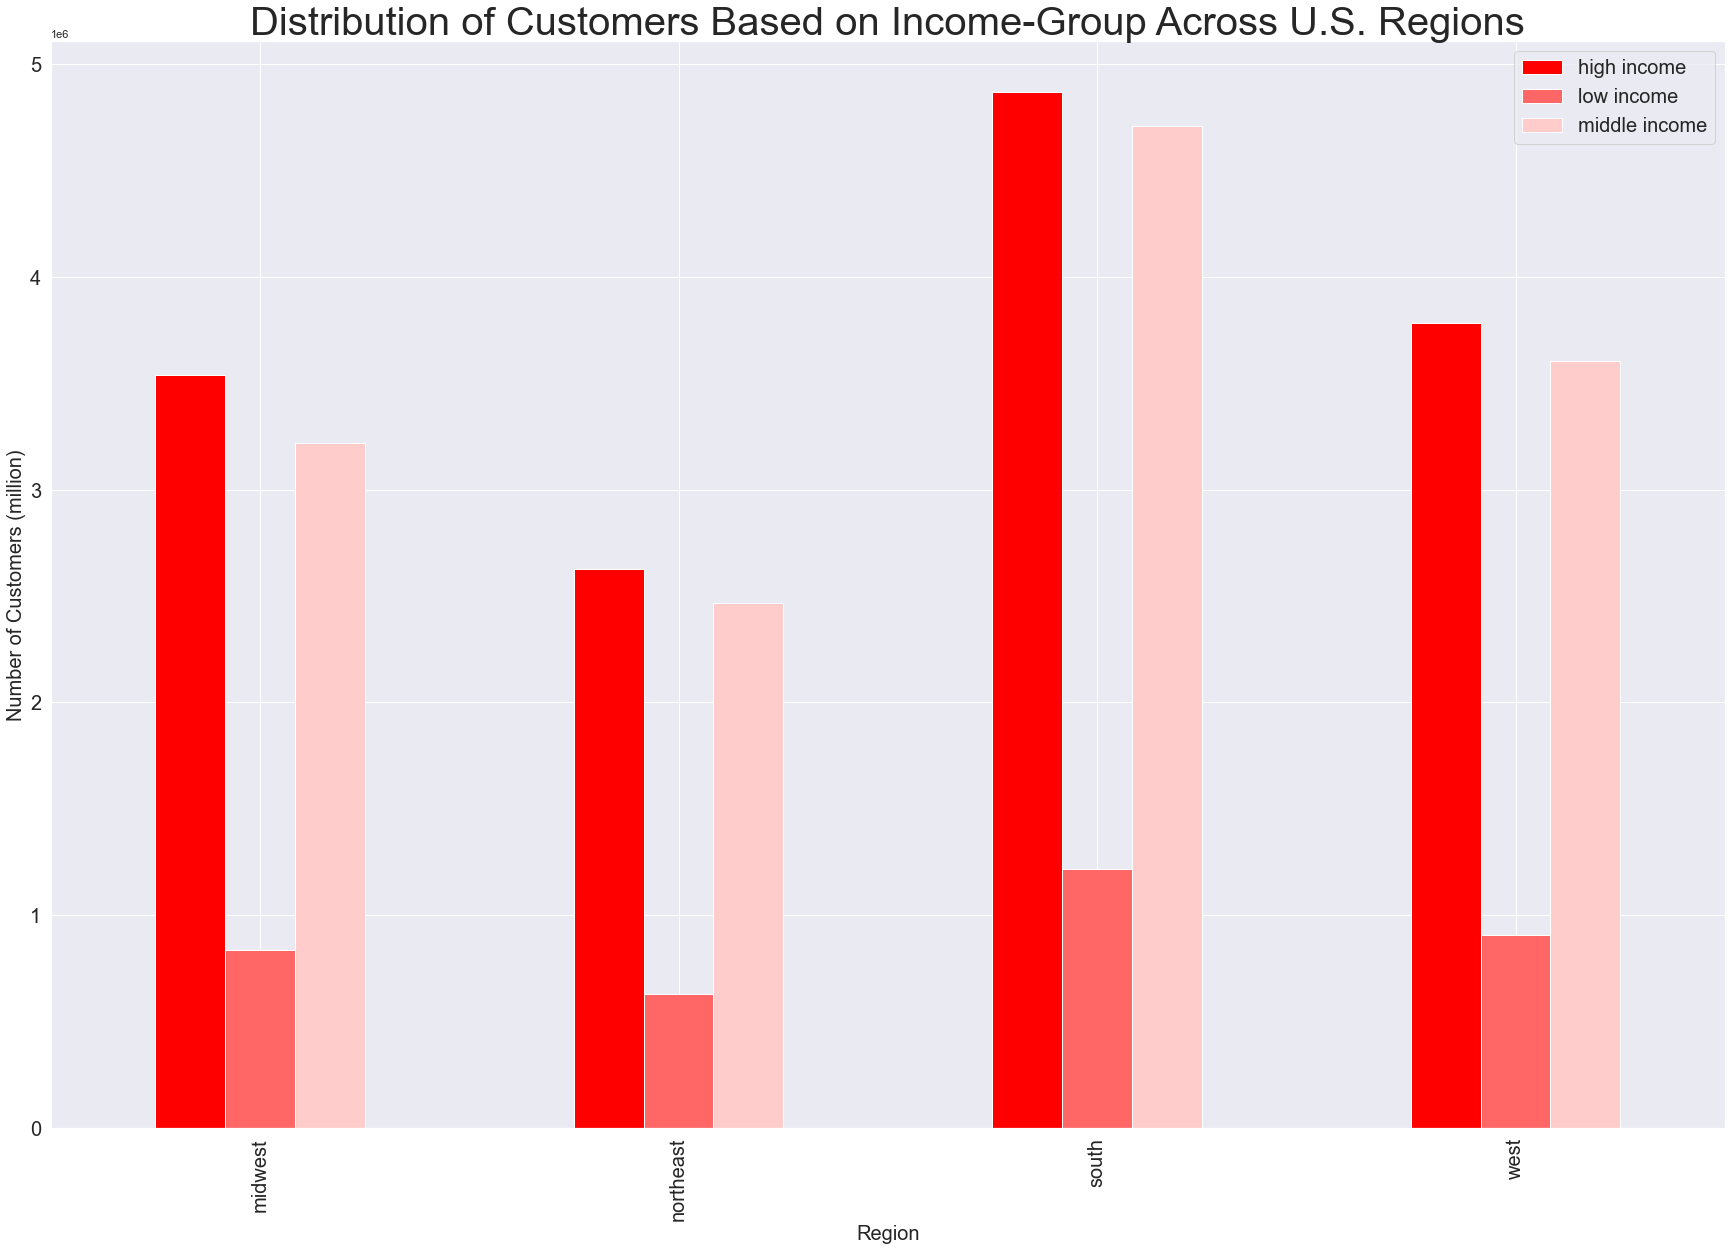

In [13]:
#Setting script figure size to 30,20
sns.set(rc = {'figure.figsize':(30,20)})
# Group bar chart of customer groups based on income-group and regions
bar_income_region=income_region.plot.bar(color=['#ff0000', '#ff6666','#ffcccc'], fontsize=20)
plt.title('Distribution of Customers Based on Income-Group Across U.S. Regions', fontsize=40)
plt.xlabel('Region', fontsize = 20)
plt.ylabel('Number of Customers (million)', fontsize = 20)
plt.legend(fontsize = 20)

Dependant profile is categorised dependants or no dependants. 

In [14]:
# using .loc to understand the customer dependant or no dependant profile
df_merged_2.loc[df_merged_2['number_of_dependants'] > 0, 'dependant_group']='dependants'
df_merged_2.loc[df_merged_2['number_of_dependants']==0,'dependant_group']='no dependants'
df_merged_2['dependant_group'].value_counts()

dependants       24306052
no dependants     8097105
Name: dependant_group, dtype: int64

In [15]:
#using cross-tab to understand the customer dependants in each region
dependants_region=pd.crosstab(df_merged_2['region'], df_merged_2['dependant_group'].sort_values(ascending=False))
dependants_region

dependant_group,dependants,no dependants
region,,
midwest,5691894,1905119
northeast,4304202,1418265
south,8089696,2701516
west,6220260,2072205


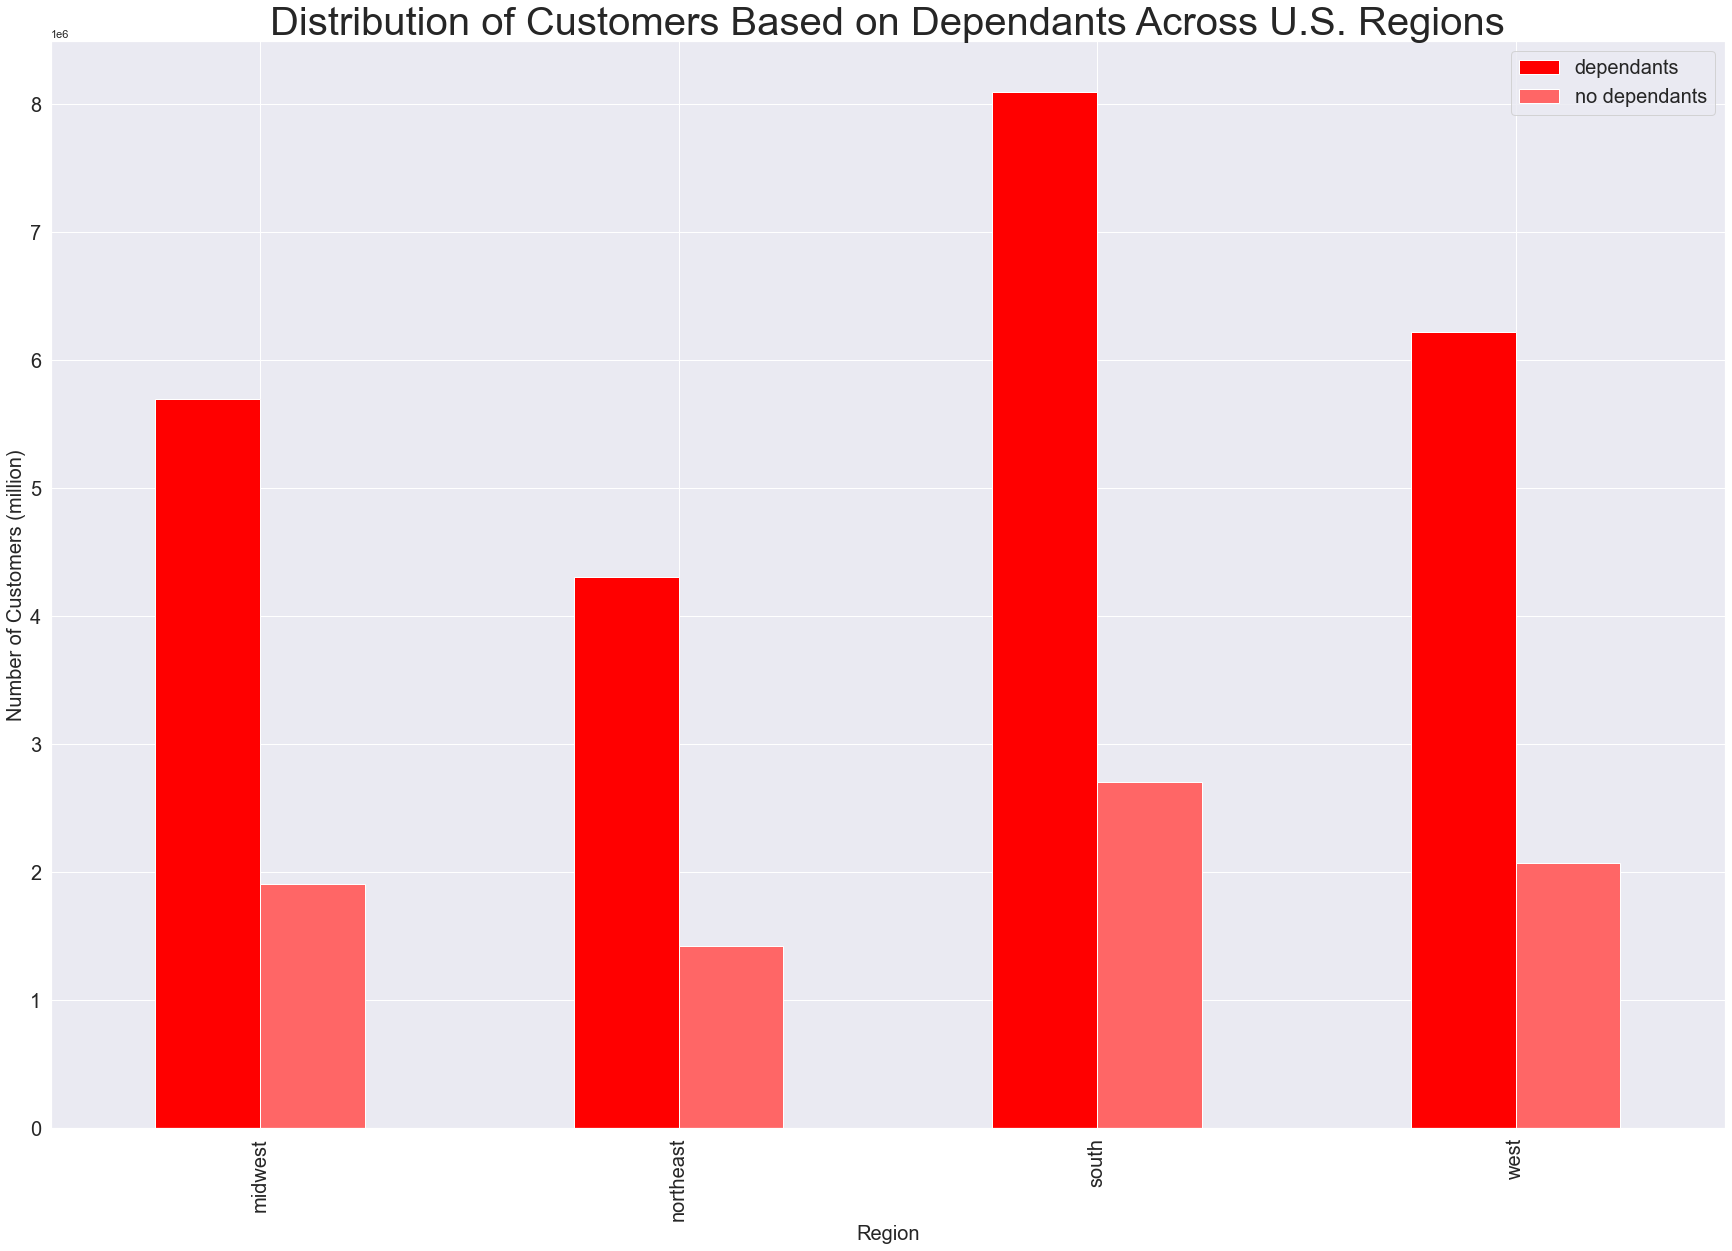

In [16]:
#Setting script figure size to 30,20
sns.set(rc = {'figure.figsize':(30,20)})
# Group bar chart of customer groups based on income-group and regions
bar_dependants_region=dependants_region.plot.bar(color=['#ff0000', '#ff6666','#ffcccc'], fontsize=20)
plt.title('Distribution of Customers Based on Dependants Across U.S. Regions', fontsize=40)
plt.xlabel('Region', fontsize = 20)
plt.ylabel('Number of Customers (million)', fontsize = 20)
plt.legend(fontsize = 20)

In [17]:
# Find the orders per department based on products
# Import department file
departments = pd.read_csv(os.path.join(path, '02 Data','Prepared Data', 'departments_wrangled.csv'))

In [18]:
# Create data dictionary for department id
zipped=zip(departments['Unnamed: 0'], departments['department'])
data_dict=dict(zipped)
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [19]:
# Map  department names to department id in dataframe
df_merged_2['department'] = df_merged_2['department_id'].map(data_dict)
df_merged_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_id,...,number_of_dependants,family_status,income,region,total_orders,Activity_flag,age_group,income_group,dependant_group,department
0,2539329,1,1,2,8,NaN,196.0,1.0,0.0,195,...,3,married,40423,south,59,regular Activity,young,low income,dependants,beverages
1,2398795,1,2,3,7,15.0,196.0,1.0,1.0,195,...,3,married,40423,south,59,regular Activity,young,low income,dependants,beverages
2,473747,1,3,3,12,21.0,196.0,1.0,1.0,195,...,3,married,40423,south,59,regular Activity,young,low income,dependants,beverages
3,2254736,1,4,4,7,29.0,196.0,1.0,1.0,195,...,3,married,40423,south,59,regular Activity,young,low income,dependants,beverages
4,431534,1,5,4,15,28.0,196.0,1.0,1.0,195,...,3,married,40423,south,59,regular Activity,young,low income,dependants,beverages


In [20]:
# Count the number of orders per department
df_merged_2['department'].value_counts()

produce            9478765
dairy eggs         5398389
snacks             2887289
beverages          2687384
frozen             2234540
pantry             1875218
bakery             1172359
canned goods       1068013
deli               1051193
dry goods pasta     866608
household           738487
meat seafood        708879
breakfast           704062
personal care       447554
babies              423791
international       269244
alcohol             153677
pets                 97710
missing              69142
other                36283
bulk                 34570
Name: department, dtype: int64

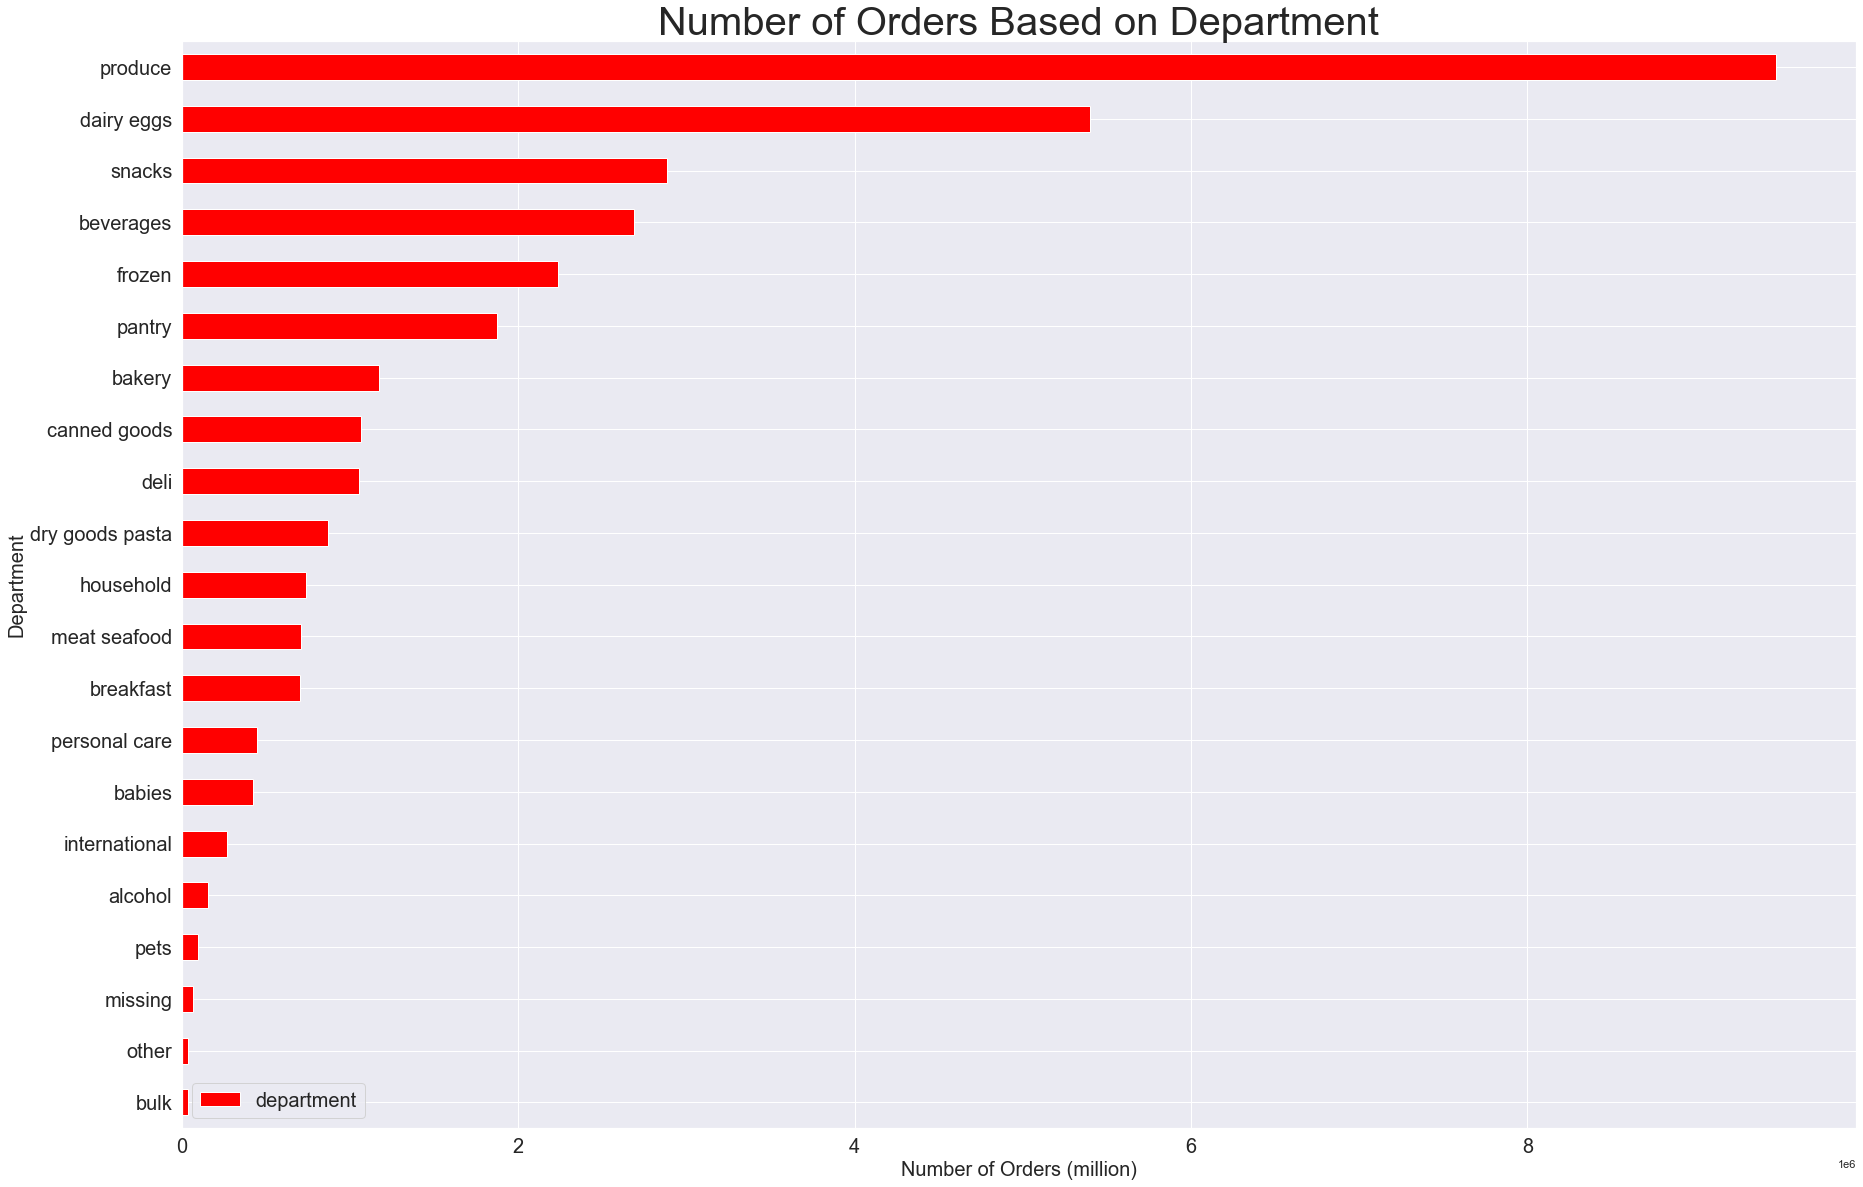

In [22]:
# Create a bar chart for the number of orders across departments
bar_department_orders=df_merged_2['department'].value_counts().sort_values(ascending=True).plot.barh(color=['#ff0000'], fontsize=20)
plt.title('Number of Orders Based on Department', fontsize=40)
plt.xlabel('Number of Orders (million)', fontsize=20)
plt.ylabel('Department', fontsize=20)
plt.legend(fontsize=20)

In [23]:
#using cross-tab to understand the customer purchase department at each group
age_department=pd.crosstab(df_merged_2['department'], df_merged_2['age_group'].sort_values(ascending=False))
age_department

age_group,middle,older,young
department,,,
alcohol,59766,39037,54874
babies,167981,109440,146370
bakery,458653,309506,404200
beverages,1058857,714622,913905
breakfast,276407,184065,243590
bulk,13328,9241,12001
canned goods,416363,282433,369217
dairy eggs,2102315,1426119,1869955
deli,411605,277605,361983


In [24]:
# Find the relationship between royalty flag and age group
age_loyalty = pd.crosstab(df_merged_2['age_group'], df_merged_2['loyalty_flag'].sort_values(ascending=False))
age_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
age_group,,,
middle,4040893,2448000,6176101
older,2724001,1655495,4195104
young,3519502,2137871,5506190


<AxesSubplot:title={'center':'Pie Chart of Royalty Customer Based on Age'}>

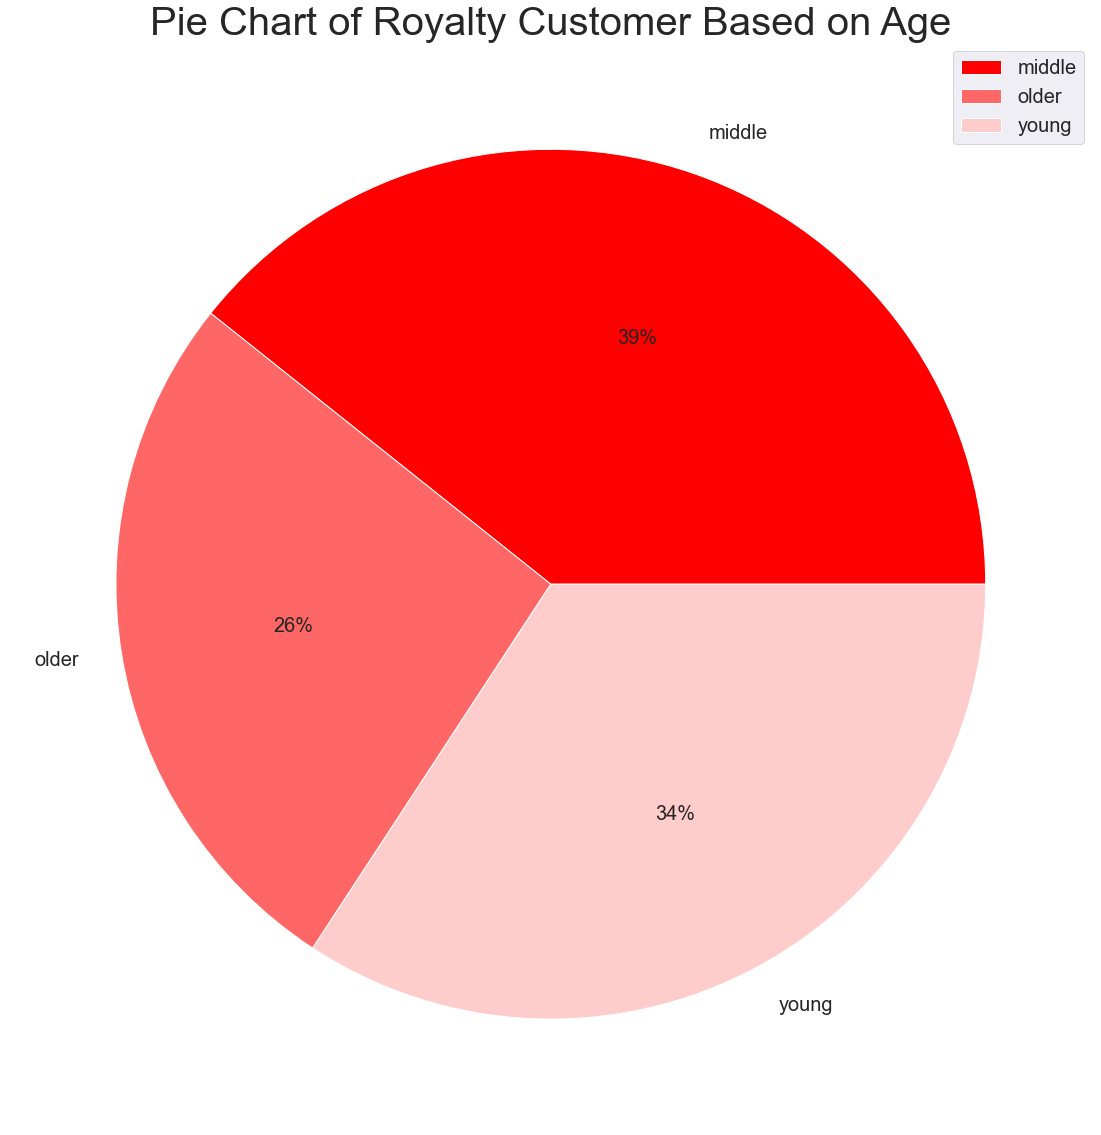

In [25]:
#Loyalty flag for young customers
pie_loyal_age=age_loyalty['Loyal customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Royalty Customer Based on Age', fontsize=40)
plt.legend(fontsize = 20)
pie_loyal_age

<AxesSubplot:title={'center':'Pie Chart of New Customer Based on Age'}>

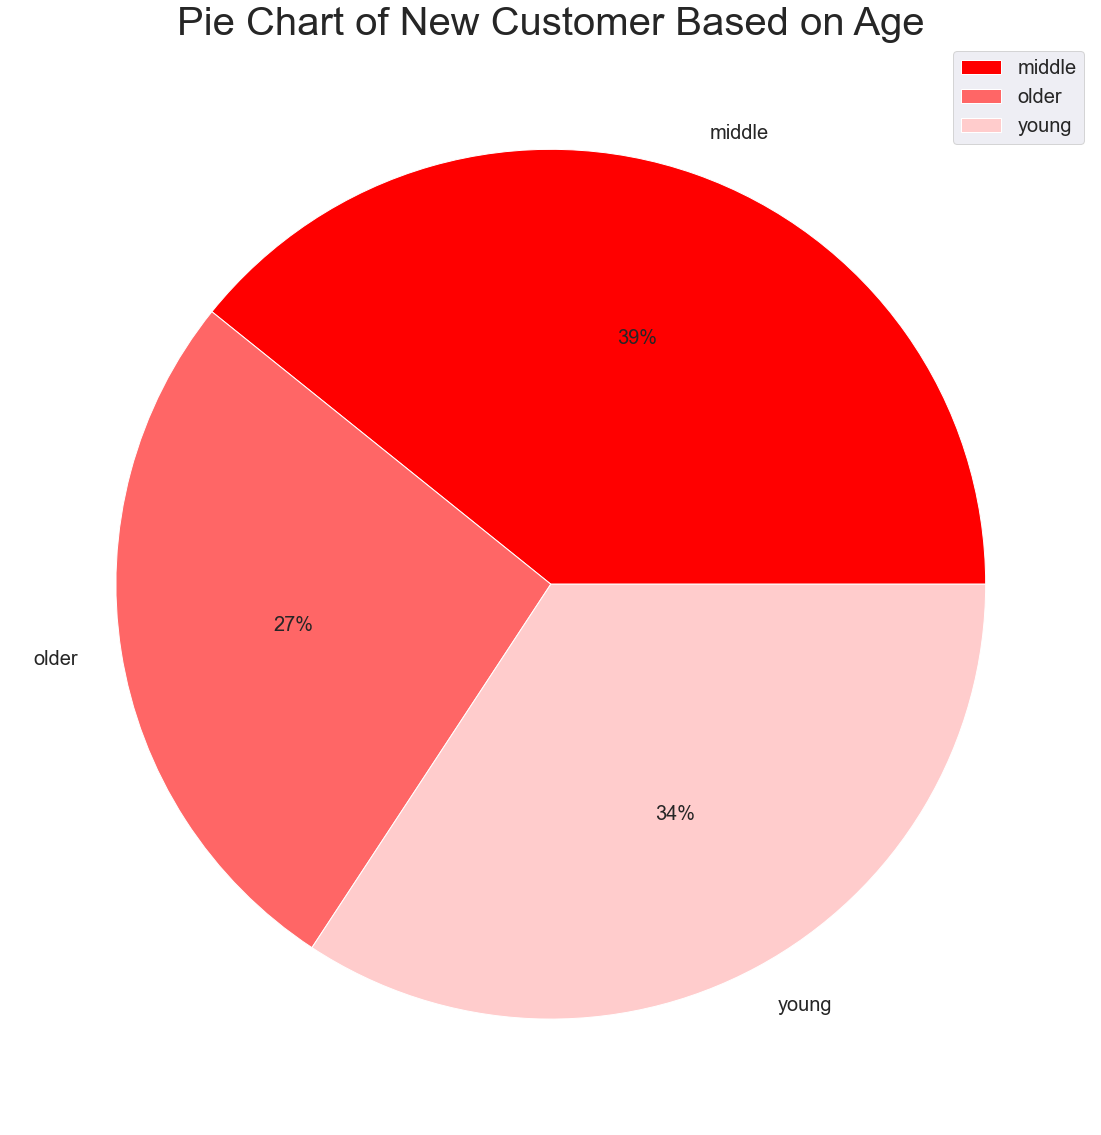

In [26]:
#Loyalty flag for new customers
pie_new_customer_age=age_loyalty['New customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of New Customer Based on Age', fontsize=40)
plt.legend(fontsize = 20)
pie_new_customer_age

<AxesSubplot:title={'center':'Pie Chart of Regular Customer Based on Age'}>

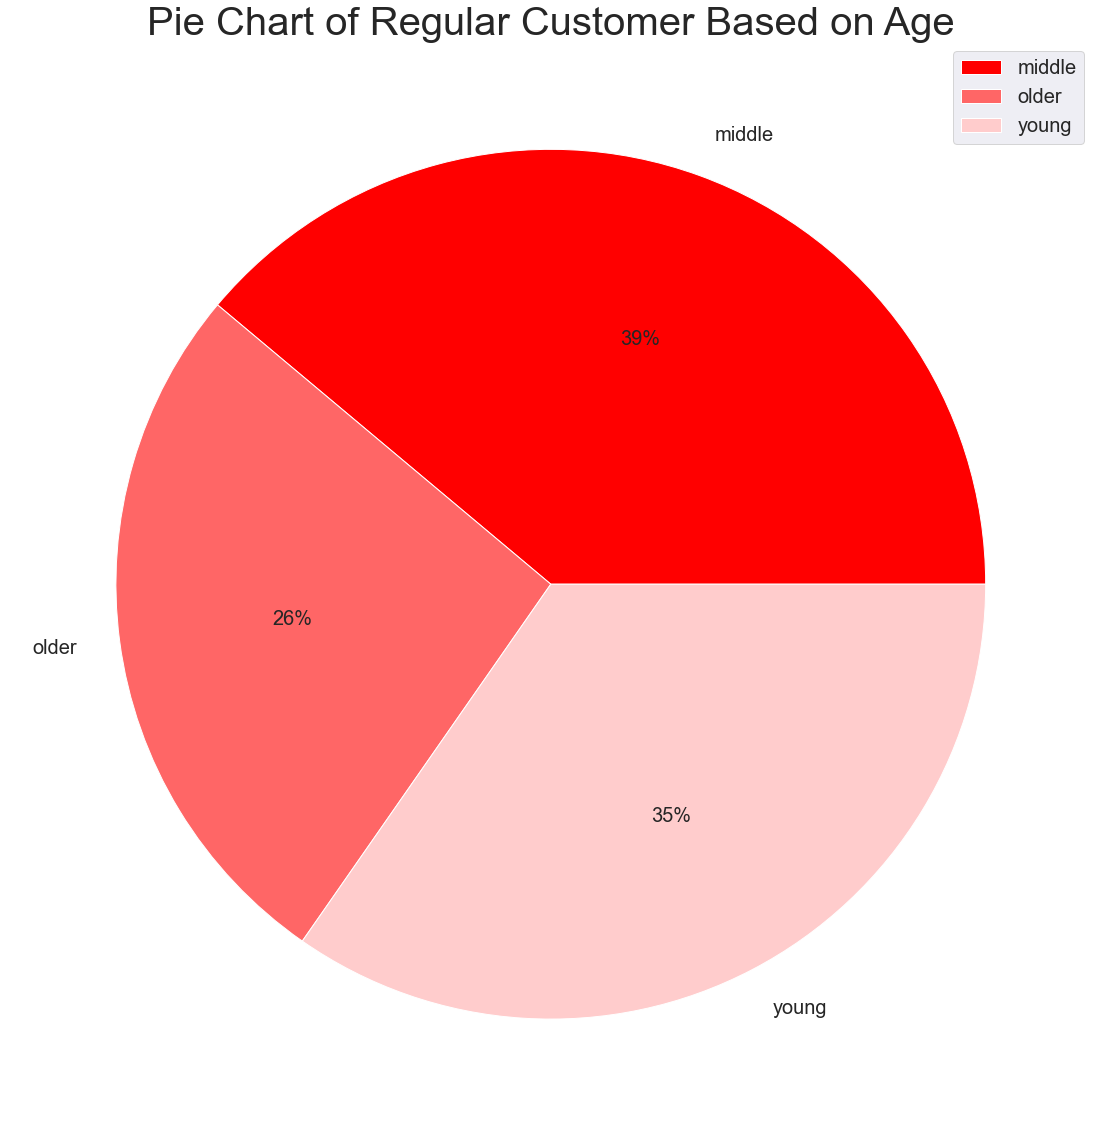

In [27]:
#Loyalty flag for regular customers
pie_regular_customer_age=age_loyalty['Regular customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Regular Customer Based on Age', fontsize=40)
plt.legend(fontsize = 20)
pie_regular_customer_age

In [28]:
# Find the Order Time based on age group
age_order_time = pd.crosstab(df_merged_2['order_hour_of_day'], df_merged_2['age_group'])
age_order_time

age_group,middle,older,young
order_hour_of_day,,,
0,84648,56610,77501
1,44814,30135,40739
2,26452,18304,24608
3,19277,13964,18037
4,20378,14327,18532
5,33720,24047,30185
6,110571,77583,102318
7,345414,240252,305357
8,673321,456821,587883


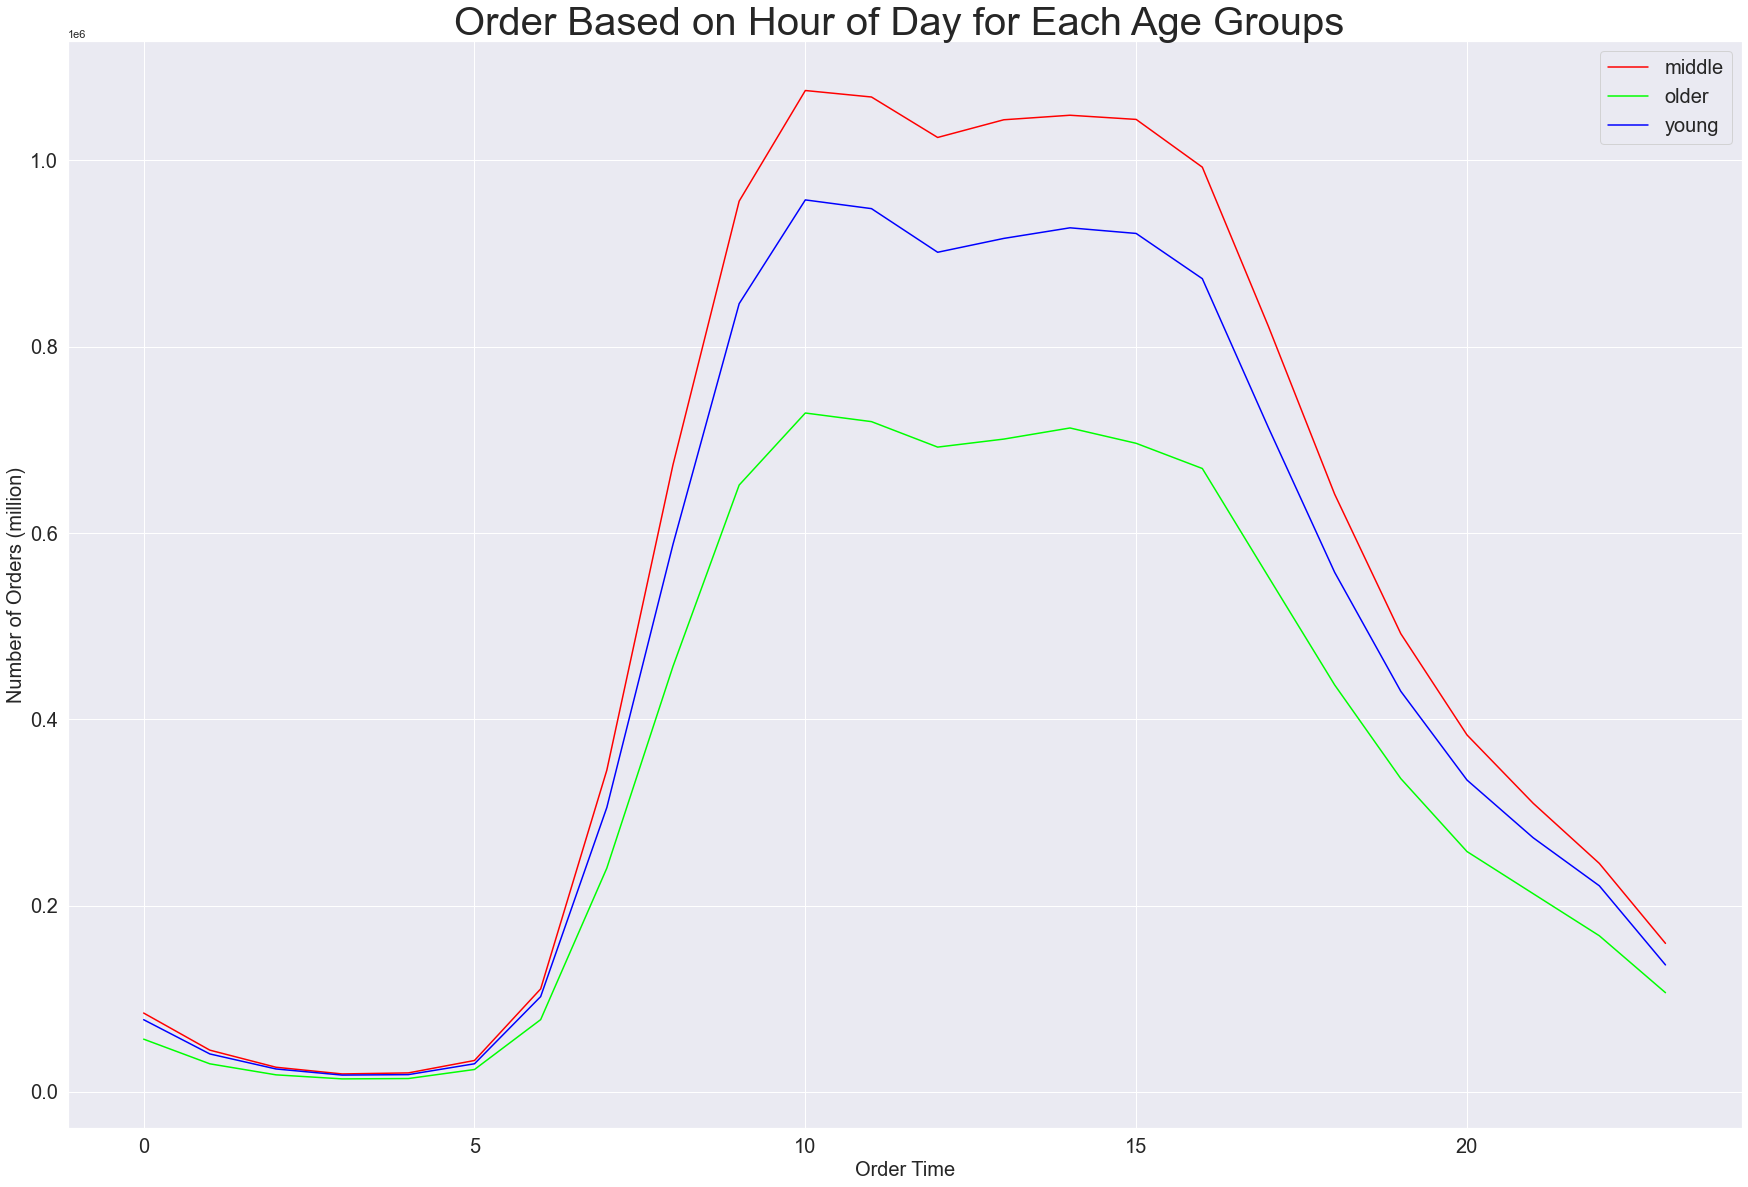

In [29]:
# Develop the line chart of orders based on age groups
linechart_age_order_time=age_order_time.plot(kind='line', color=['#ff0000', '#00ff00','#0000ff'], fontsize=20)
plt.title('Order Based on Hour of Day for Each Age Groups ', fontsize=40)
plt.xlabel('Order Time', fontsize=20)
plt.ylabel('Number of Orders (million)', fontsize=20)
plt.legend(fontsize=20)

In [30]:
# Find the Order Day per Week based on age group
age_order_week = pd.crosstab(df_merged_2['orders_day_of_week'], df_merged_2['age_group'])
age_order_week

age_group,middle,older,young
orders_day_of_week,,,
0,2415557,1643168,2145257
1,2209812,1483048,1967059
2,1656935,1114301,1442362
3,1498725,1022880,1318688
4,1477192,998180,1308223
5,1643020,1113288,1449191
6,1763753,1199735,1532783


In [31]:
#Renaming the day
age_order_week = age_order_week.rename(index={0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
age_order_week

age_group,middle,older,young
orders_day_of_week,,,
Saturday,2415557,1643168,2145257
Sunday,2209812,1483048,1967059
Monday,1656935,1114301,1442362
Tuesday,1498725,1022880,1318688
Wednesday,1477192,998180,1308223
Thursday,1643020,1113288,1449191
Friday,1763753,1199735,1532783


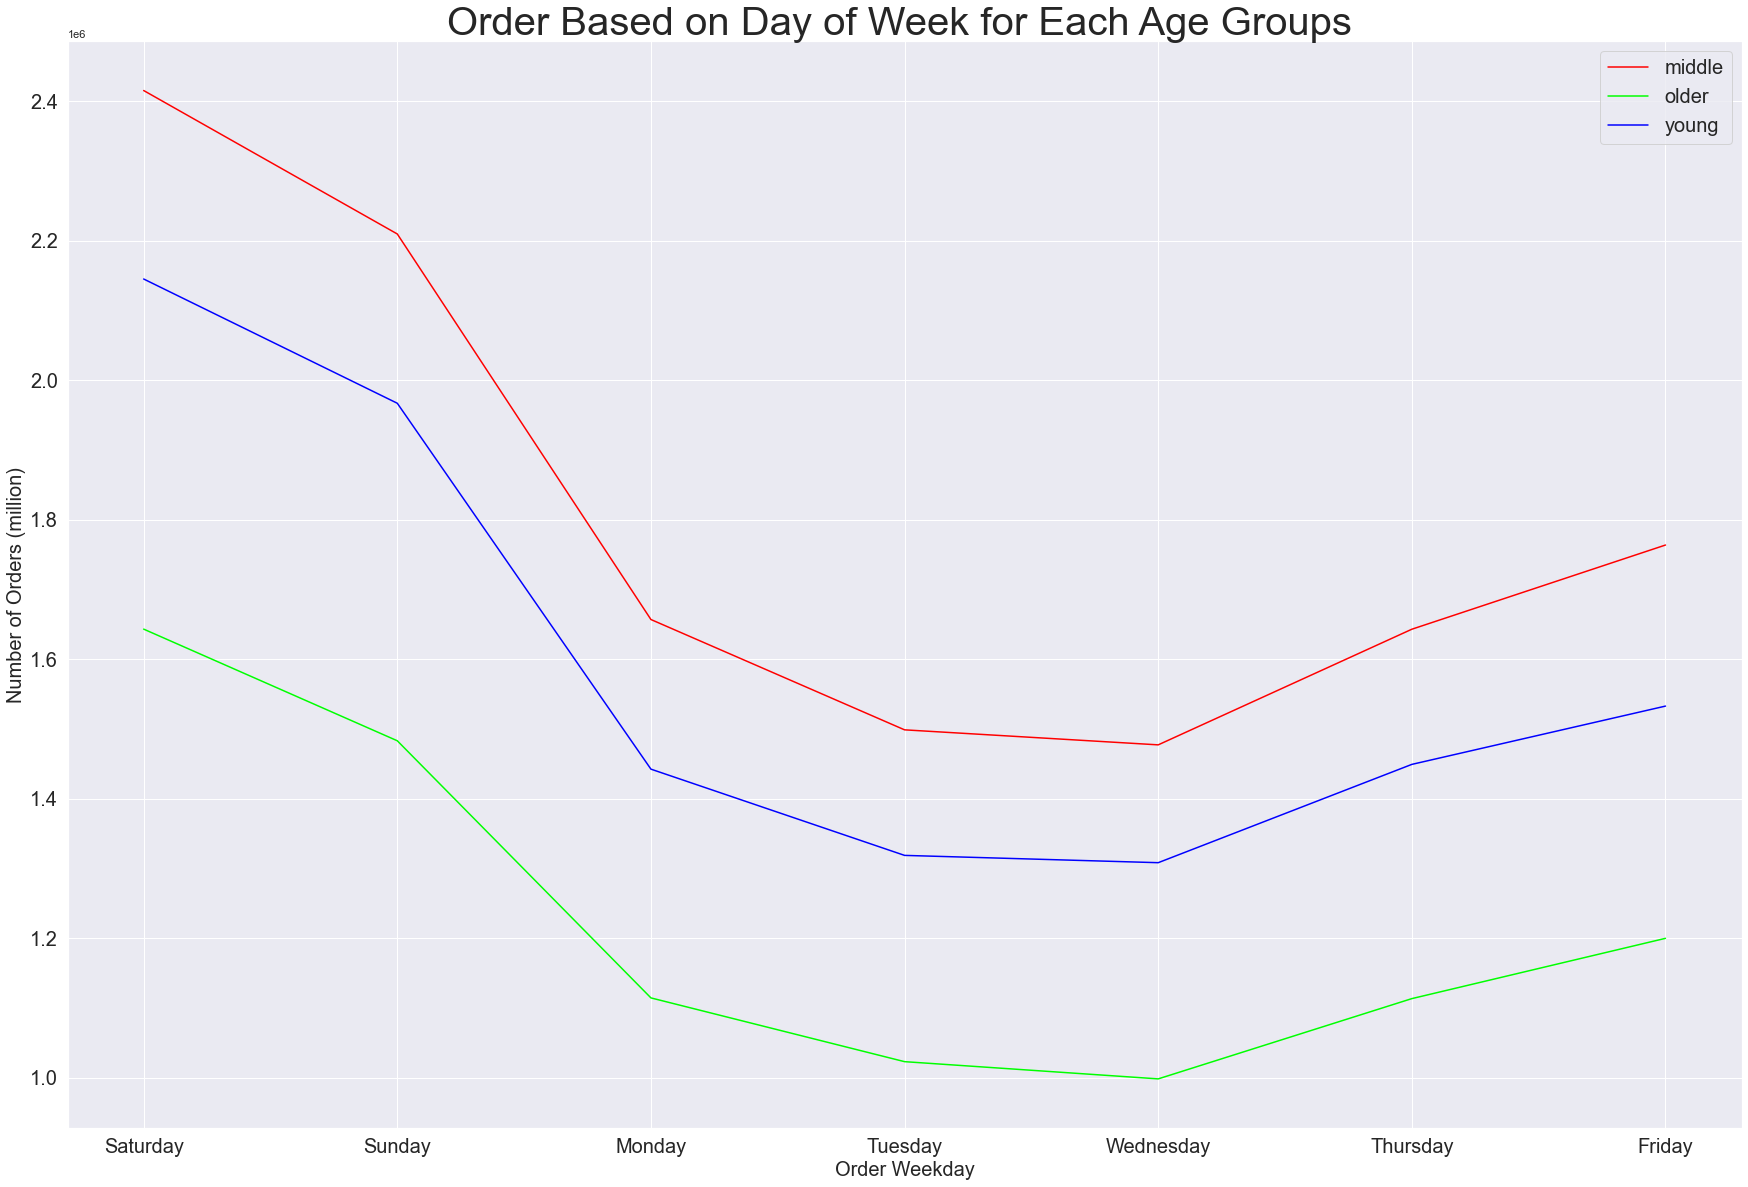

In [32]:
# Develop the line chart of orders based on age groups
linechart_age_order_week=age_order_week.plot(kind='line', color=['#ff0000', '#00ff00','#0000ff'], fontsize=20)
plt.title('Order Based on Day of Week for Each Age Groups ', fontsize=40)
plt.xlabel('Order Weekday', fontsize=20)
plt.ylabel('Number of Orders (million)', fontsize=20)
plt.legend(fontsize=20)

In [33]:
#using cross-tab to understand the customer purchase department at each income group
income_department=pd.crosstab(df_merged_2['department'], df_merged_2['income_group'].sort_values(ascending=False))
income_department

income_group,high income,low income,middle income
department,,,
alcohol,72741,19802,61134
babies,202332,30857,190602
bakery,549499,114688,508172
beverages,1173276,405197,1108911
breakfast,311075,97475,295512
bulk,14691,4886,14993
canned goods,509578,86631,471804
dairy eggs,2501935,534942,2361512
deli,482100,114077,455016


In [34]:
# Find the relationship between royalty flag and income group
income_loyalty = pd.crosstab(df_merged_2['income_group'], df_merged_2['loyalty_flag'].sort_values(ascending=False))
income_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
income_group,,,
high income,4758339,2750237,7305917
low income,1032959,857656,1702513
middle income,4493098,2633473,6868965


<AxesSubplot:title={'center':'Pie Chart of Royalty Customer Based on Income'}>

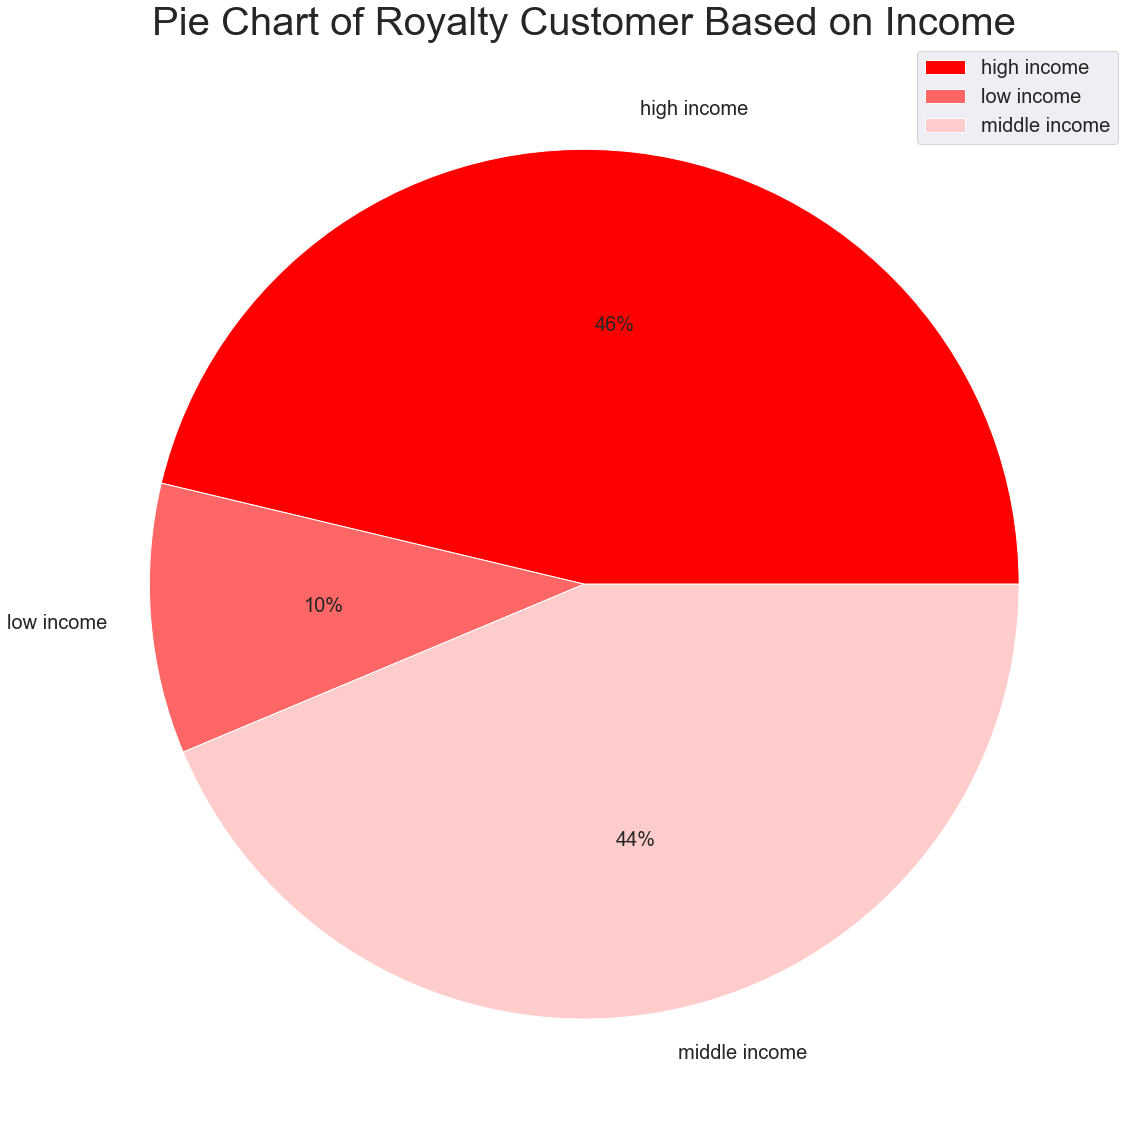

In [35]:
#Loyalty flag for loyalty customers based on lower income
pie_loyal_income=income_loyalty['Loyal customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Royalty Customer Based on Income', fontsize=40)
plt.legend(fontsize = 20)
pie_loyal_income

<AxesSubplot:title={'center':'Pie Chart of New Customer Based on Age'}>

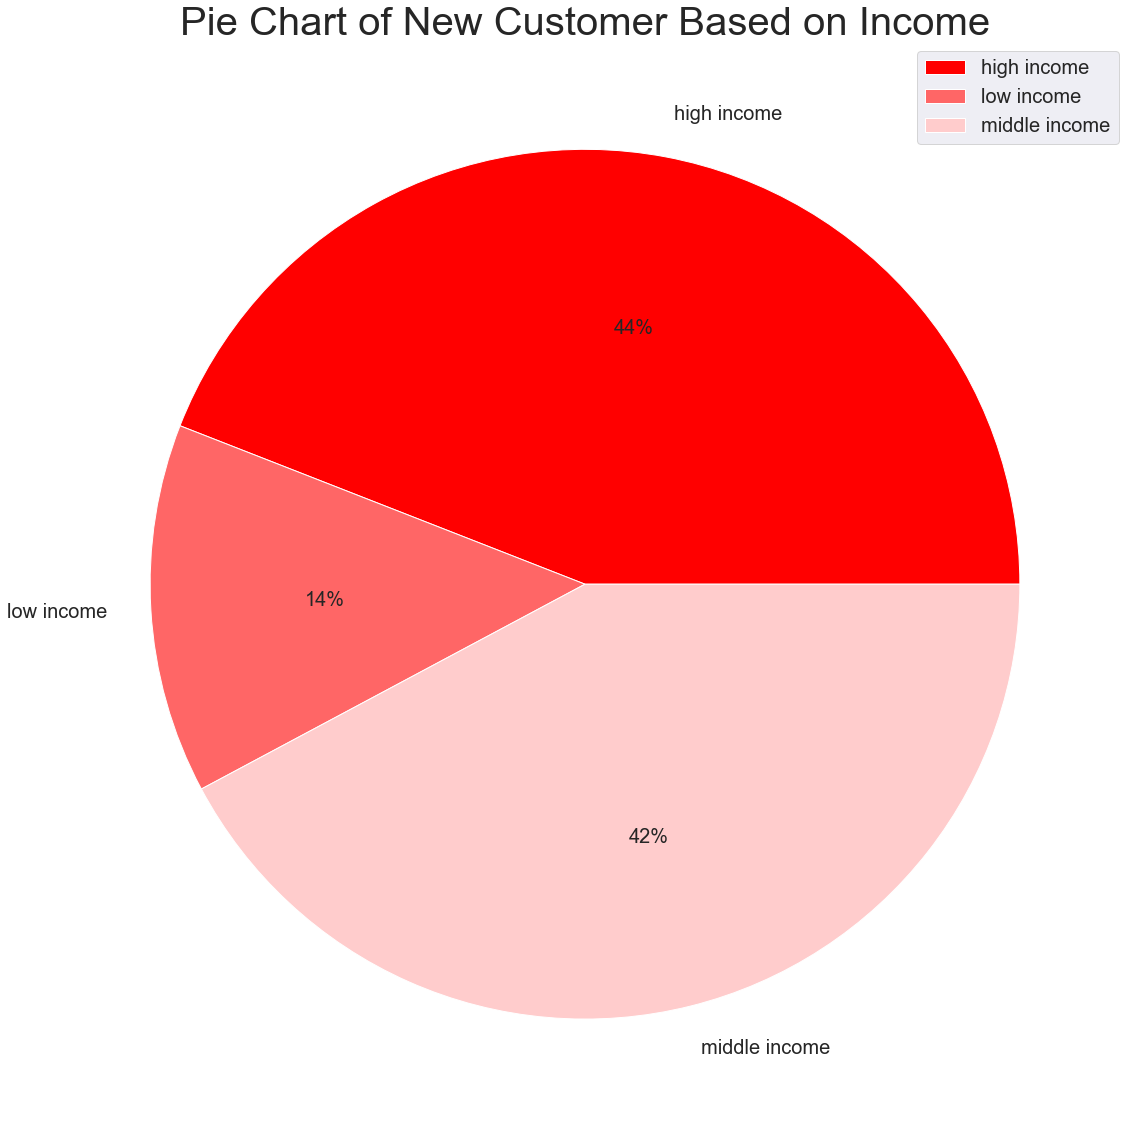

In [36]:
#Loyalty flag for new customers based on middle income
pie_new_customer_income=income_loyalty['New customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of New Customer Based on Income', fontsize=40)
plt.legend(fontsize = 20)
pie_new_customer_age

<AxesSubplot:title={'center':'Pie Chart of Regular Customer Based on Income'}>

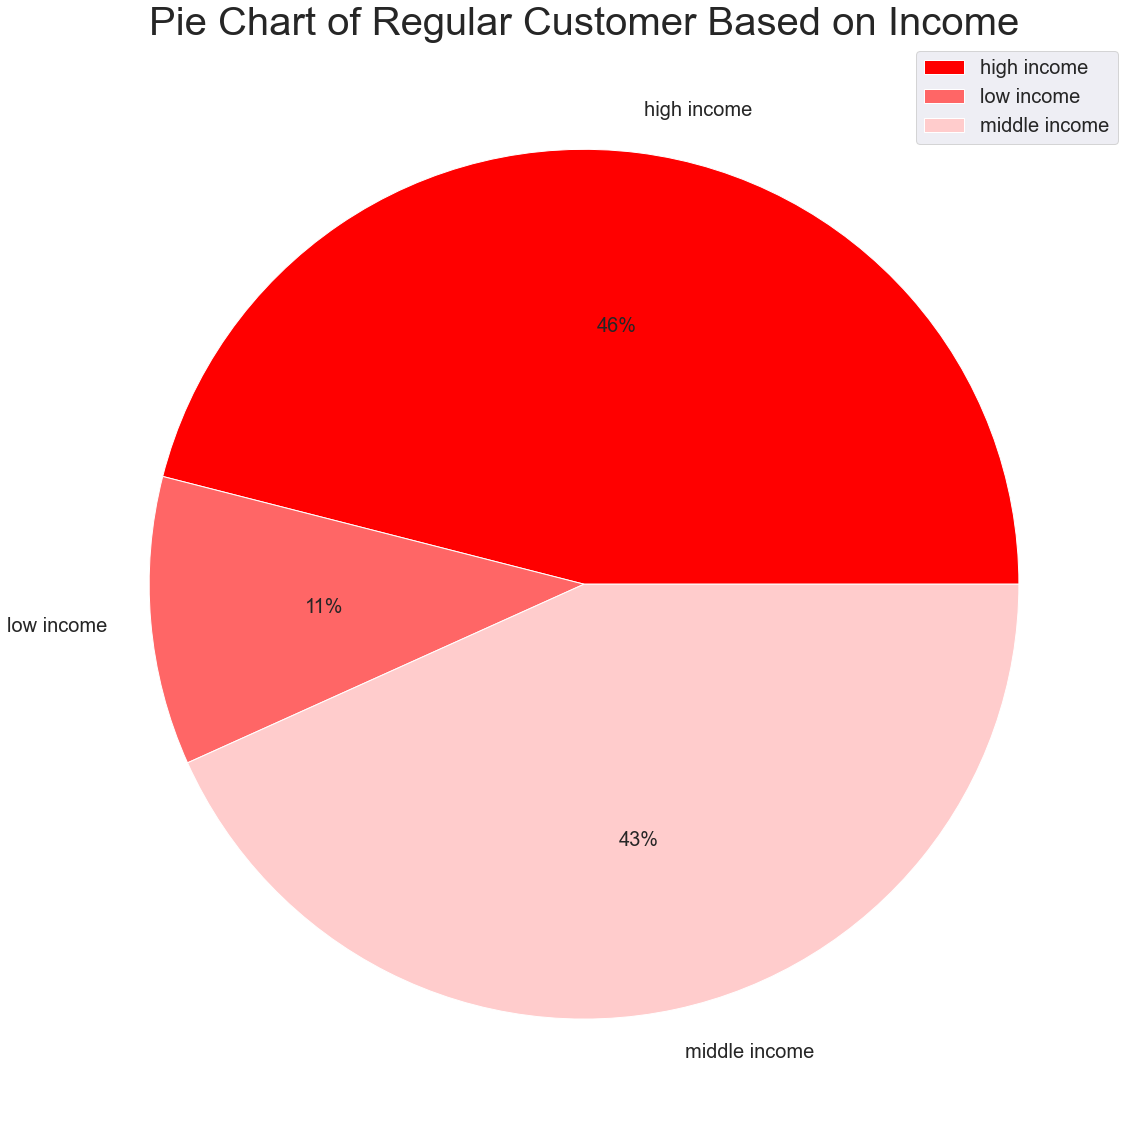

In [37]:
#Loyalty flag for new customers based on high income
pie_regular_customer_income=income_loyalty['Regular customer'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Regular Customer Based on Income', fontsize=40)
plt.legend(fontsize = 20)
pie_regular_customer_income

In [38]:
# Find the Order Time based on income group
income_order_time = pd.crosstab(df_merged_2['order_hour_of_day'], df_merged_2['income_group'])
income_order_time

income_group,high income,low income,middle income
order_hour_of_day,,,
0,98875,22818,97066
1,52244,12187,51257
2,30857,7985,30522
3,22740,5851,22687
4,24717,5736,22784
5,40934,9020,37998
6,134052,28456,127964
7,415447,89343,386233
8,788334,190152,739539


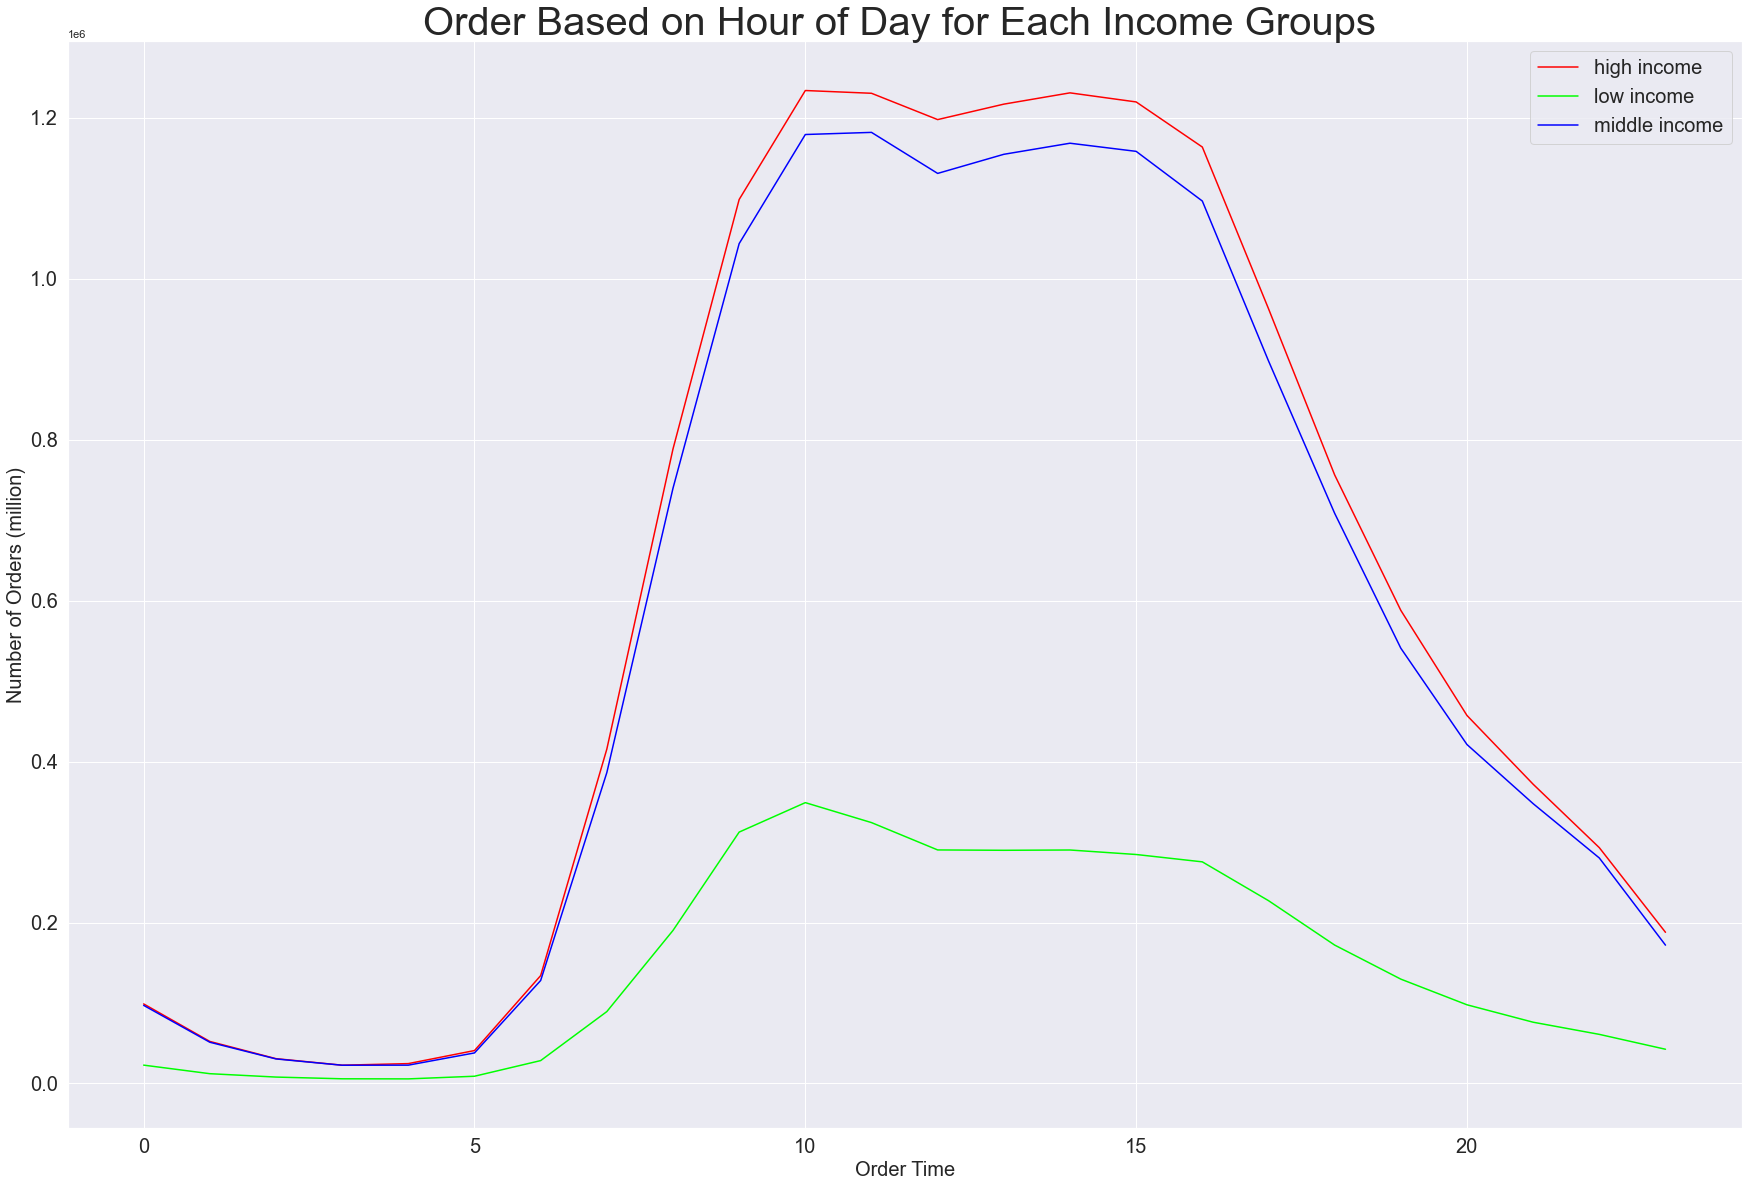

In [39]:
# Develop the line chart of orders based on income groups
linechart_income_order_time=income_order_time.plot(kind='line', color=['#ff0000', '#00ff00','#0000ff'], fontsize=20)
plt.title('Order Based on Hour of Day for Each Income Groups ', fontsize=40)
plt.xlabel('Order Time', fontsize=20)
plt.ylabel('Number of Orders (million)', fontsize=20)
plt.legend(fontsize=20)

In [40]:
# Find the Order Day per Week based on income group
income_order_week = pd.crosstab(df_merged_2['orders_day_of_week'], df_merged_2['income_group'])
income_order_week

income_group,high income,low income,middle income
orders_day_of_week,,,
0,2894023,552964,2756995
1,2531426,705678,2422815
2,1901659,511363,1800576
3,1746748,460632,1632913
4,1716463,447086,1620046
5,1908386,504058,1793055
6,2115788,411347,1969136


In [41]:
#Renaming the day
age_order_week = age_order_week.rename(index={0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
age_order_week

age_group,middle,older,young
orders_day_of_week,,,
Saturday,2415557,1643168,2145257
Sunday,2209812,1483048,1967059
Monday,1656935,1114301,1442362
Tuesday,1498725,1022880,1318688
Wednesday,1477192,998180,1308223
Thursday,1643020,1113288,1449191
Friday,1763753,1199735,1532783


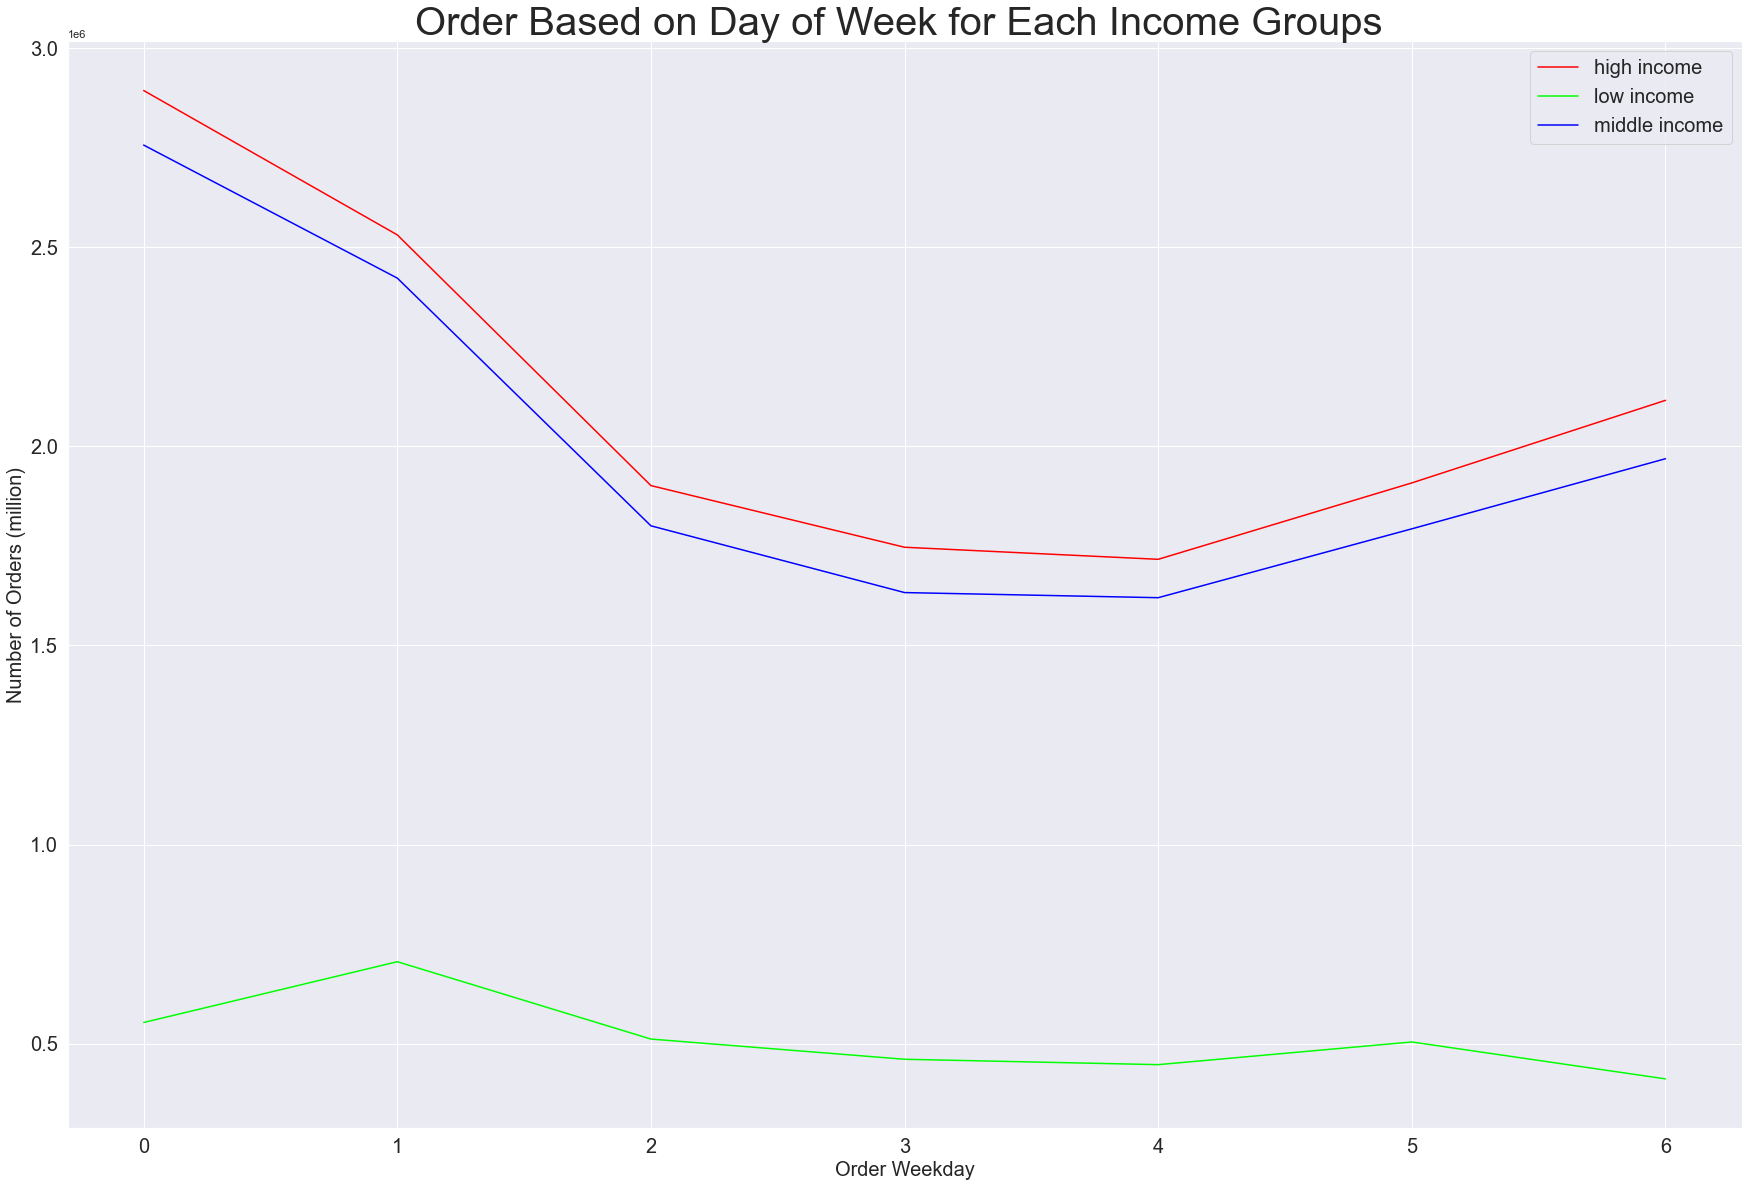

In [42]:
# Develop the line chart of orders based on age groups
linechart_income_order_week=income_order_week.plot(kind='line', color=['#ff0000', '#00ff00','#0000ff'], fontsize=20)
plt.title('Order Based on Day of Week for Each Income Groups ', fontsize=40)
plt.xlabel('Order Weekday', fontsize=20)
plt.ylabel('Number of Orders (million)', fontsize=20)
plt.legend(fontsize=20)

In [43]:
# Count the number of orders as per price range
df_merged_2['price_range_loc'].value_counts()

Mid-range product     21860174
Low-range product     10125333
High-range product      417650
Name: price_range_loc, dtype: int64

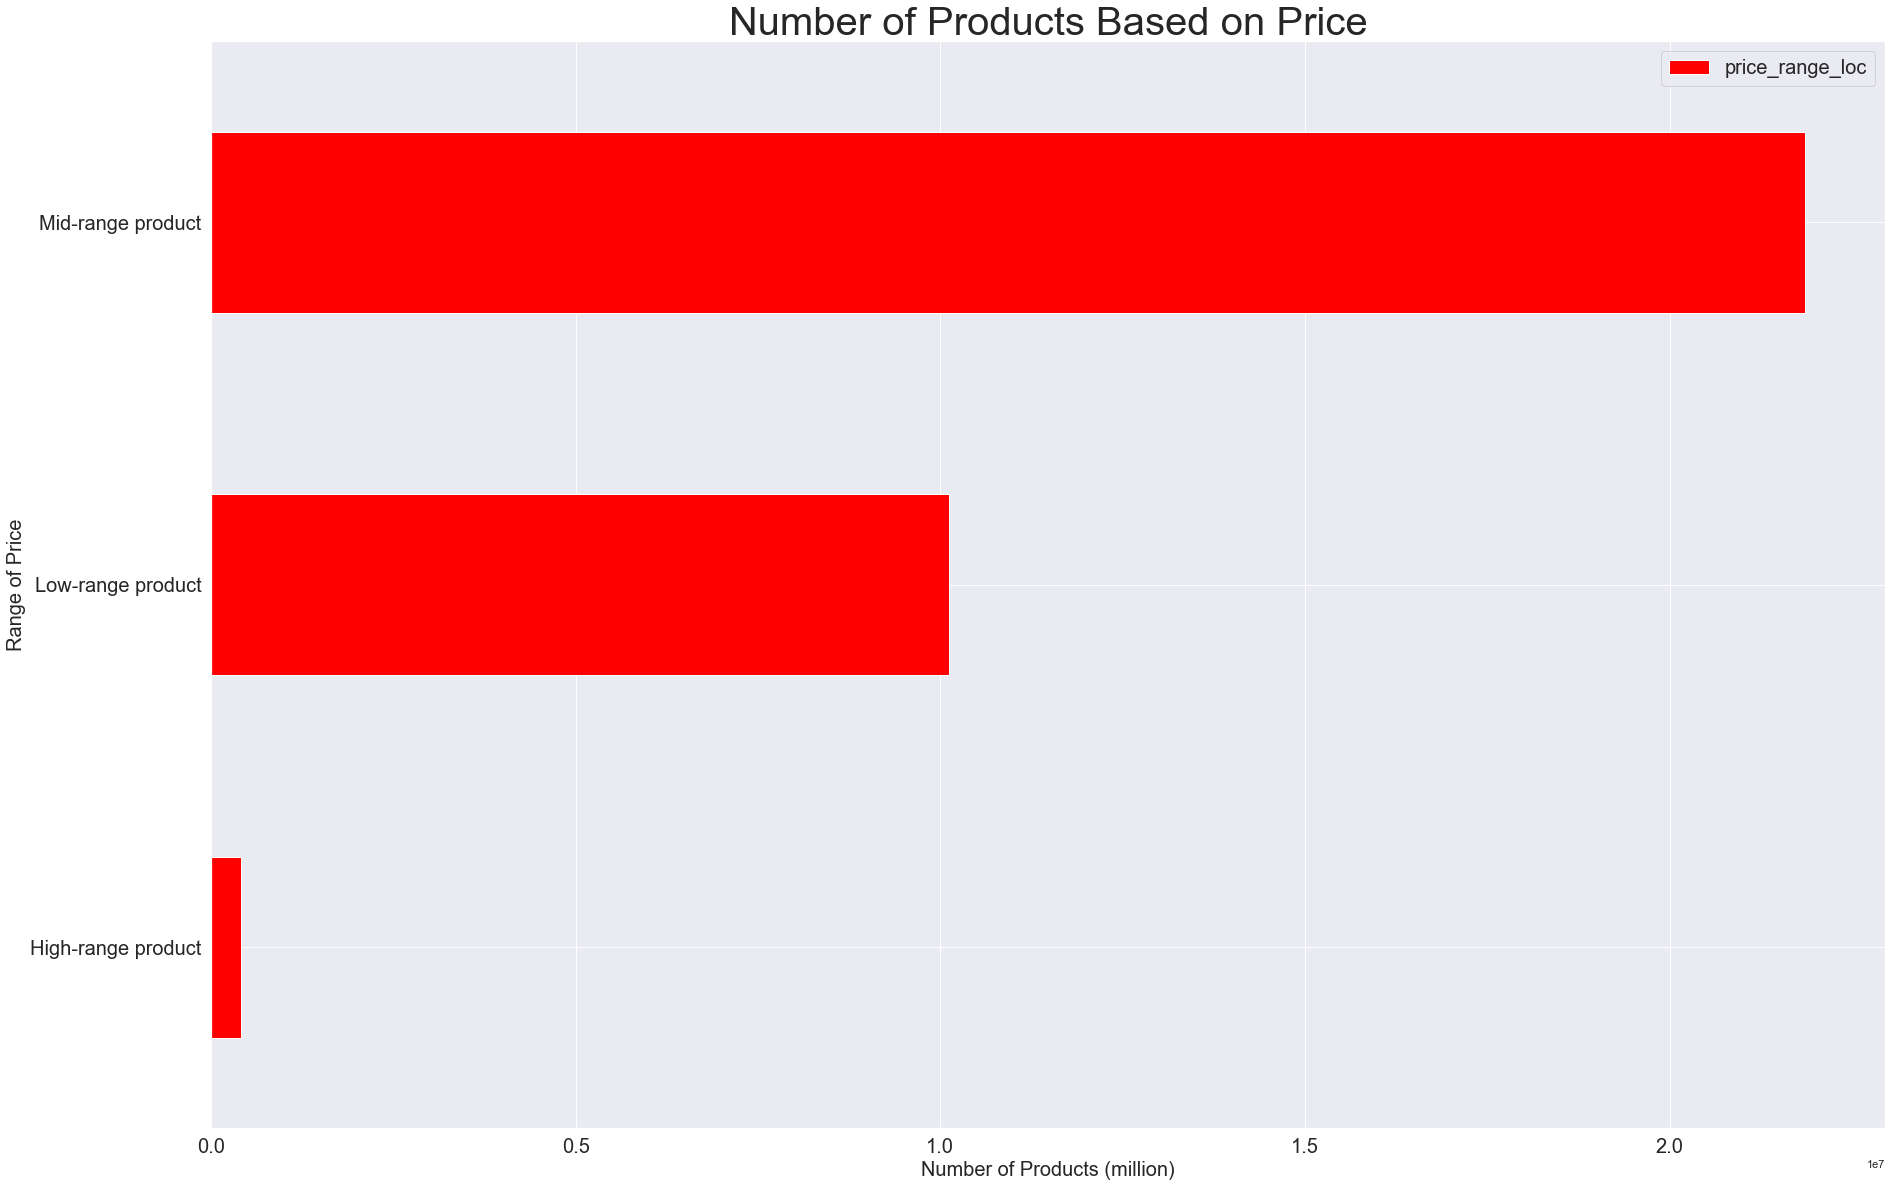

In [44]:
# Create a bar chart to show the range of the product based on the price
bar_price_rance_orders=df_merged_2['price_range_loc'].value_counts().sort_values(ascending=True).plot.barh(color=['#ff0000'], fontsize=20)
plt.title('Number of Products Based on Price', fontsize=40)
plt.xlabel('Number of Products (million)', fontsize=20)
plt.ylabel('Range of Price', fontsize=20)
plt.legend(fontsize=20)

In [45]:
#using cross-tab to understand the customer purchase behavior at each age group
age_price_range = pd.crosstab(df_merged_2['price_range_loc'], df_merged_2['age_group'].sort_values(ascending=False))
age_price_range

age_group,middle,older,young
price_range_loc,,,
High-range product,162900,111943,142807
Low-range product,3957083,2677907,3490343
Mid-range product,8545011,5784750,7530413


<AxesSubplot:title={'center':'Pie Chart of Young Customer Purchase Behavior'}>

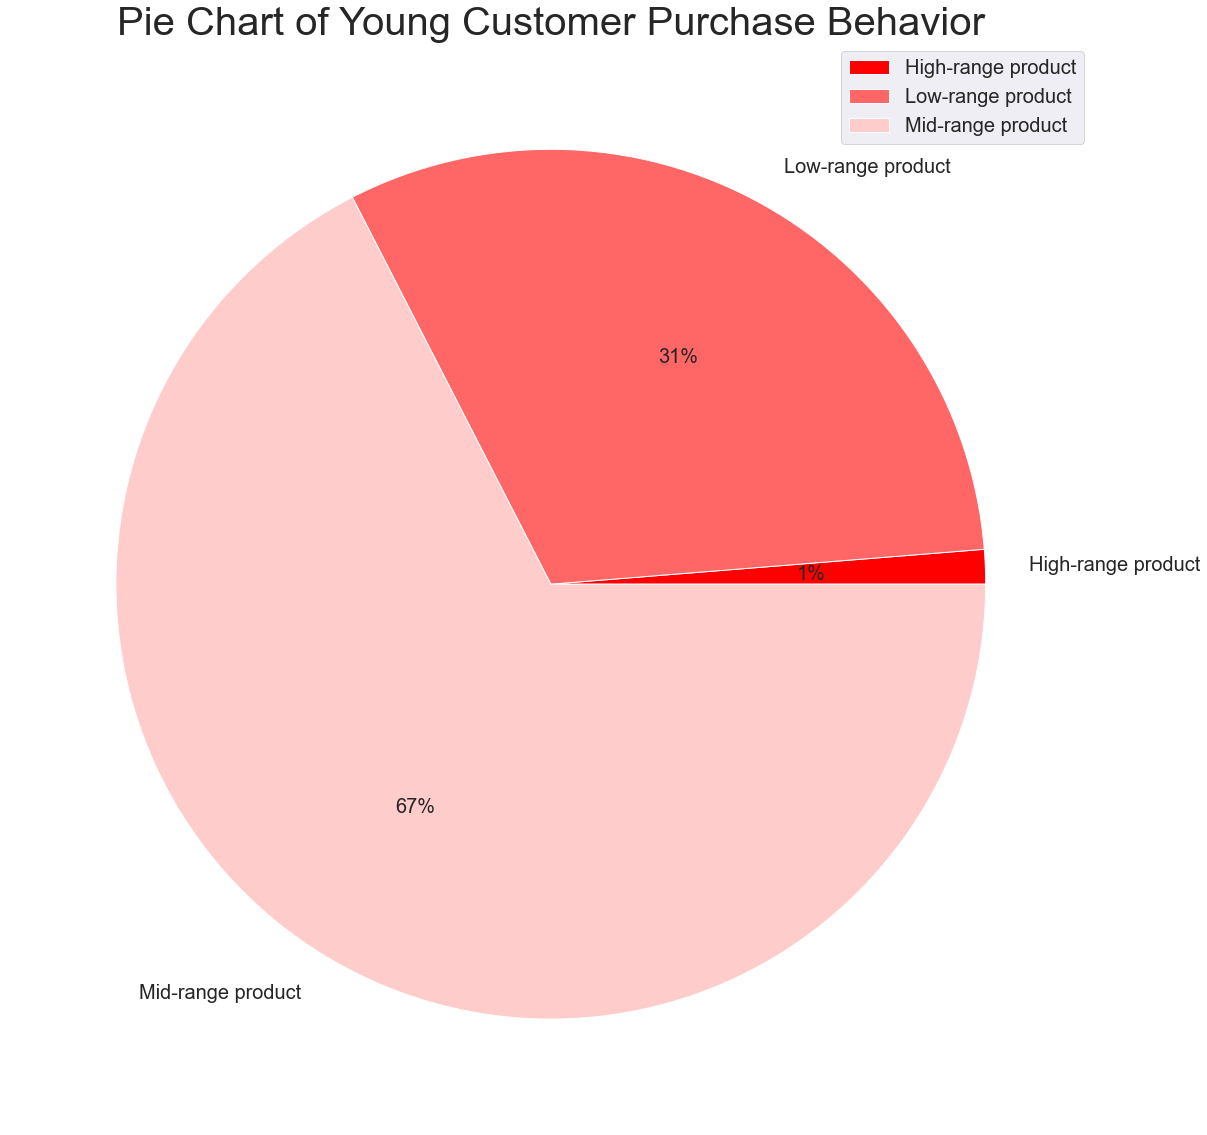

In [46]:
# Develop a pie chart to show the customer purchase behavior based on the range of the product
pie_young_age_price_range=age_price_range['young'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Young Customer Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_young_age_price_range

<AxesSubplot:title={'center':'Pie Chart of Middle Age Customer Purchase Behavior'}>

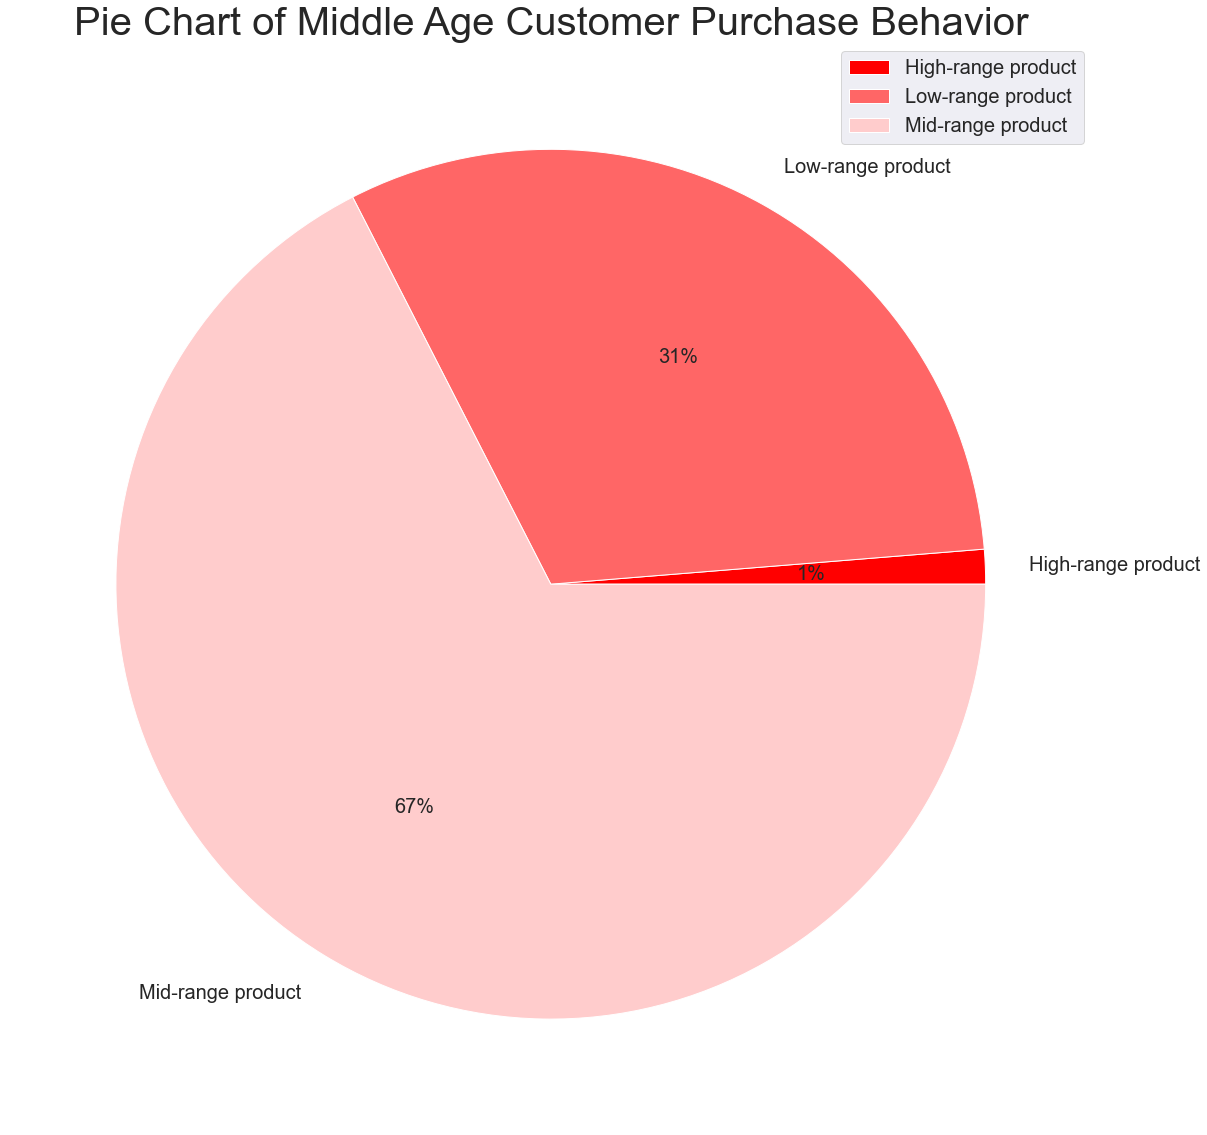

In [47]:
# Develop a pie chart to show the customer purchase behavior based on the range of the product
pie_middle_age_price_range=age_price_range['middle'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Middle Age Customer Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_middle_age_price_range

<AxesSubplot:title={'center':'Pie Chart of Older Customer Purchase Behavior'}>

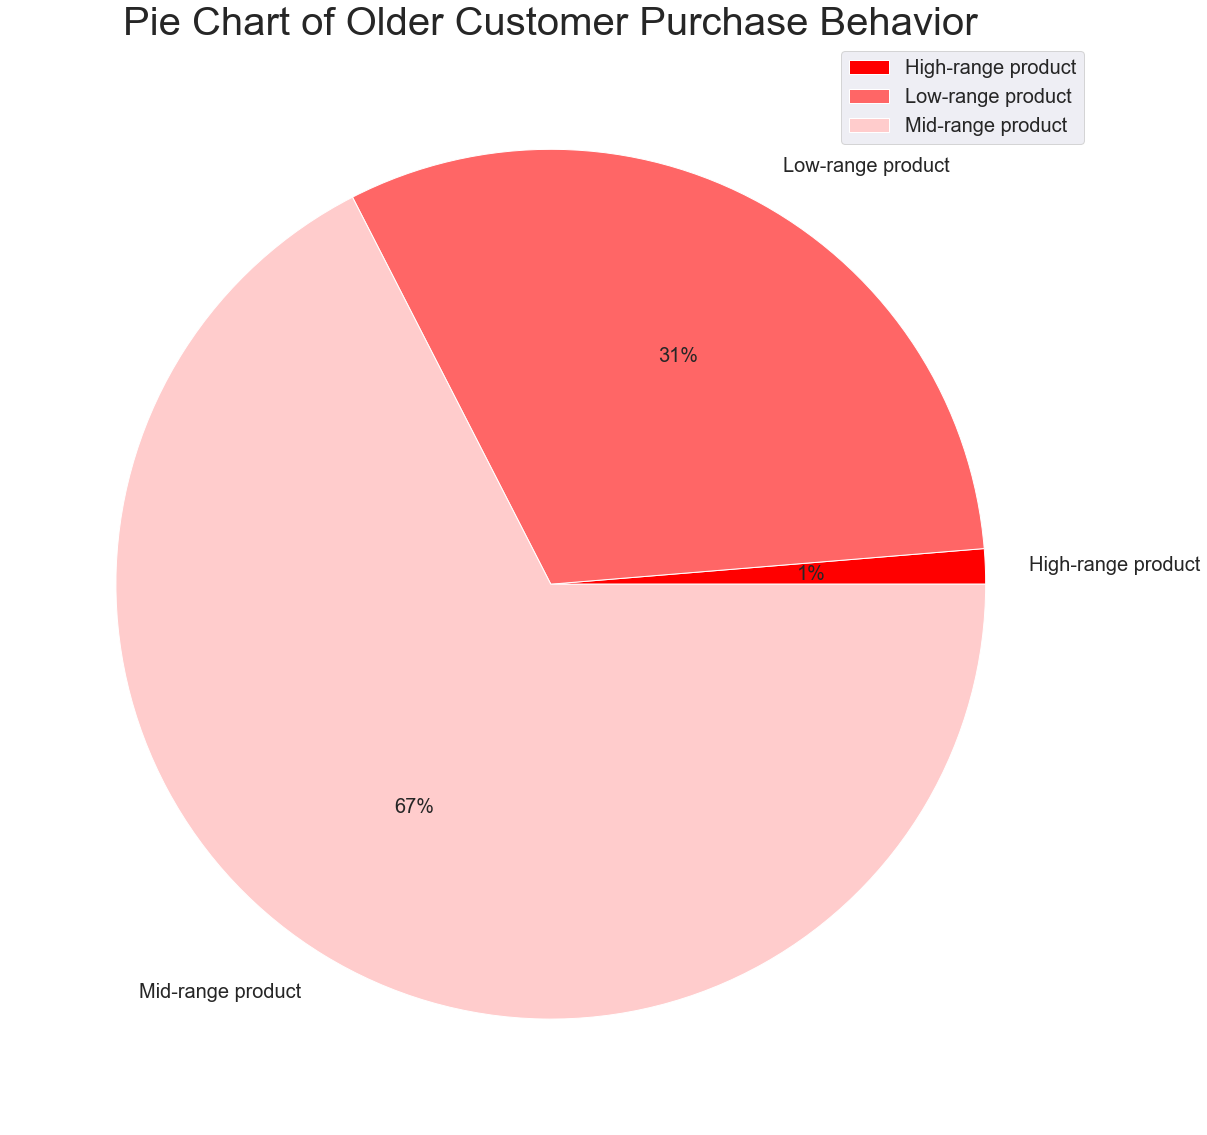

In [48]:
# Develop a pie chart to show the customer purchase behavior based on the range of the product
pie_older_age_price_range=age_price_range['older'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Older Customer Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_older_age_price_range

In [49]:
#using cross-tab to understand the customer purchase behavior at each age group
income_price_range = pd.crosstab(df_merged_2['price_range_loc'], df_merged_2['income_group'].sort_values(ascending=False))
income_price_range

income_group,high income,low income,middle income
price_range_loc,,,
High-range product,211875,18830,186945
Low-range product,4400729,1488840,4235764
Mid-range product,10201889,2085458,9572827


<AxesSubplot:title={'center':'Pie Chart of High Income Customer Purchase Behavior'}>

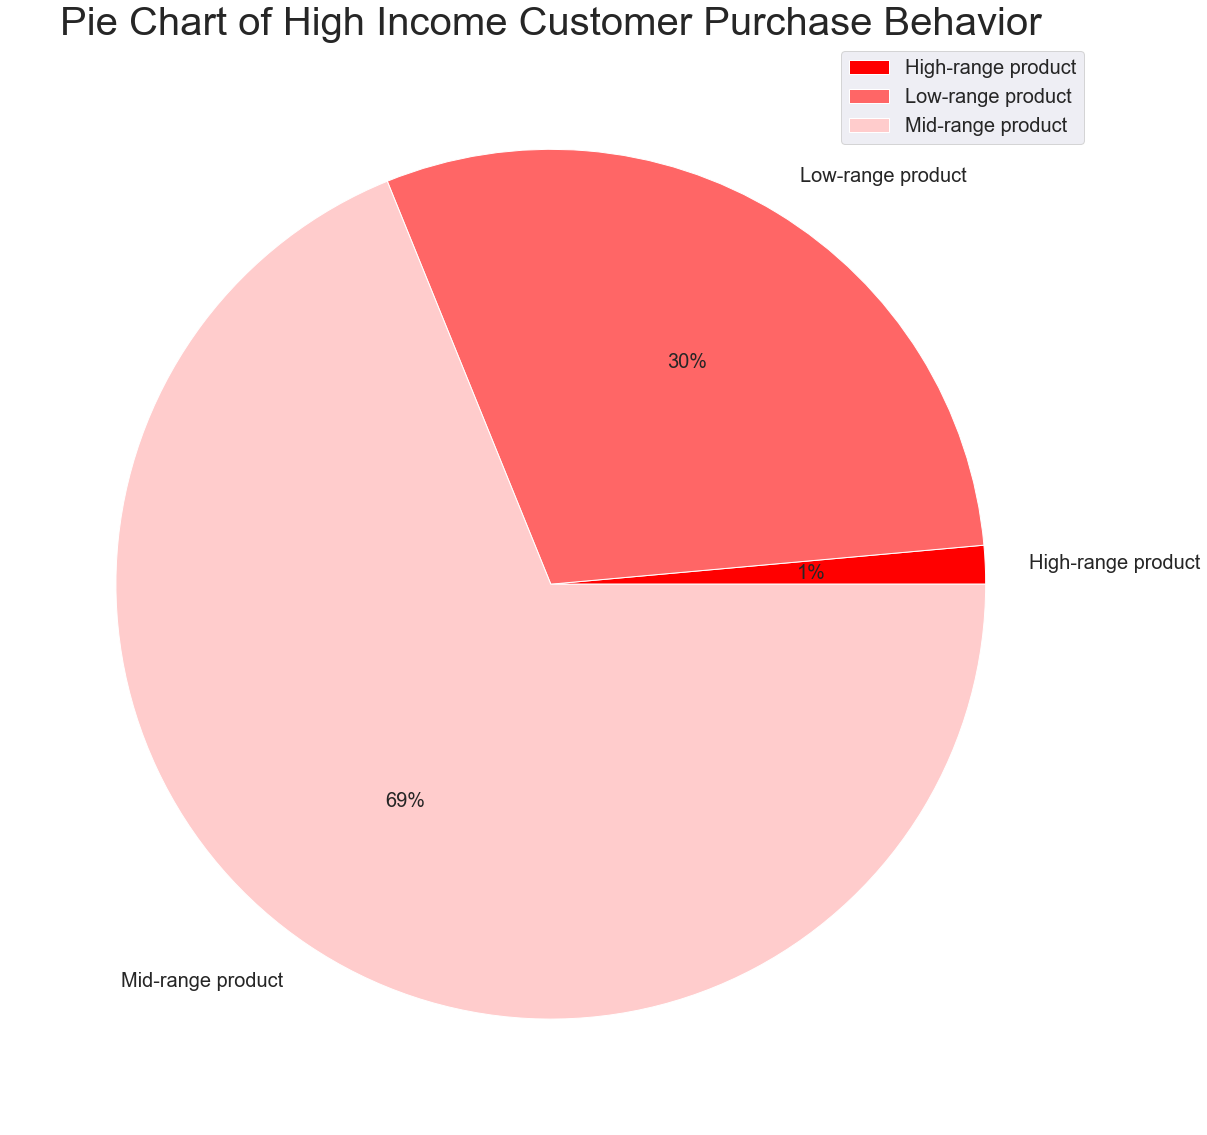

In [50]:
# Develop a pie chart to show the customer purchase behavior based on the range of the product
pie_high_income_price_range=income_price_range['high income'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of High Income Customer Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_high_income_price_range

<AxesSubplot:title={'center':'Pie Chart of Middle Income Customer Purchase Behavior'}>

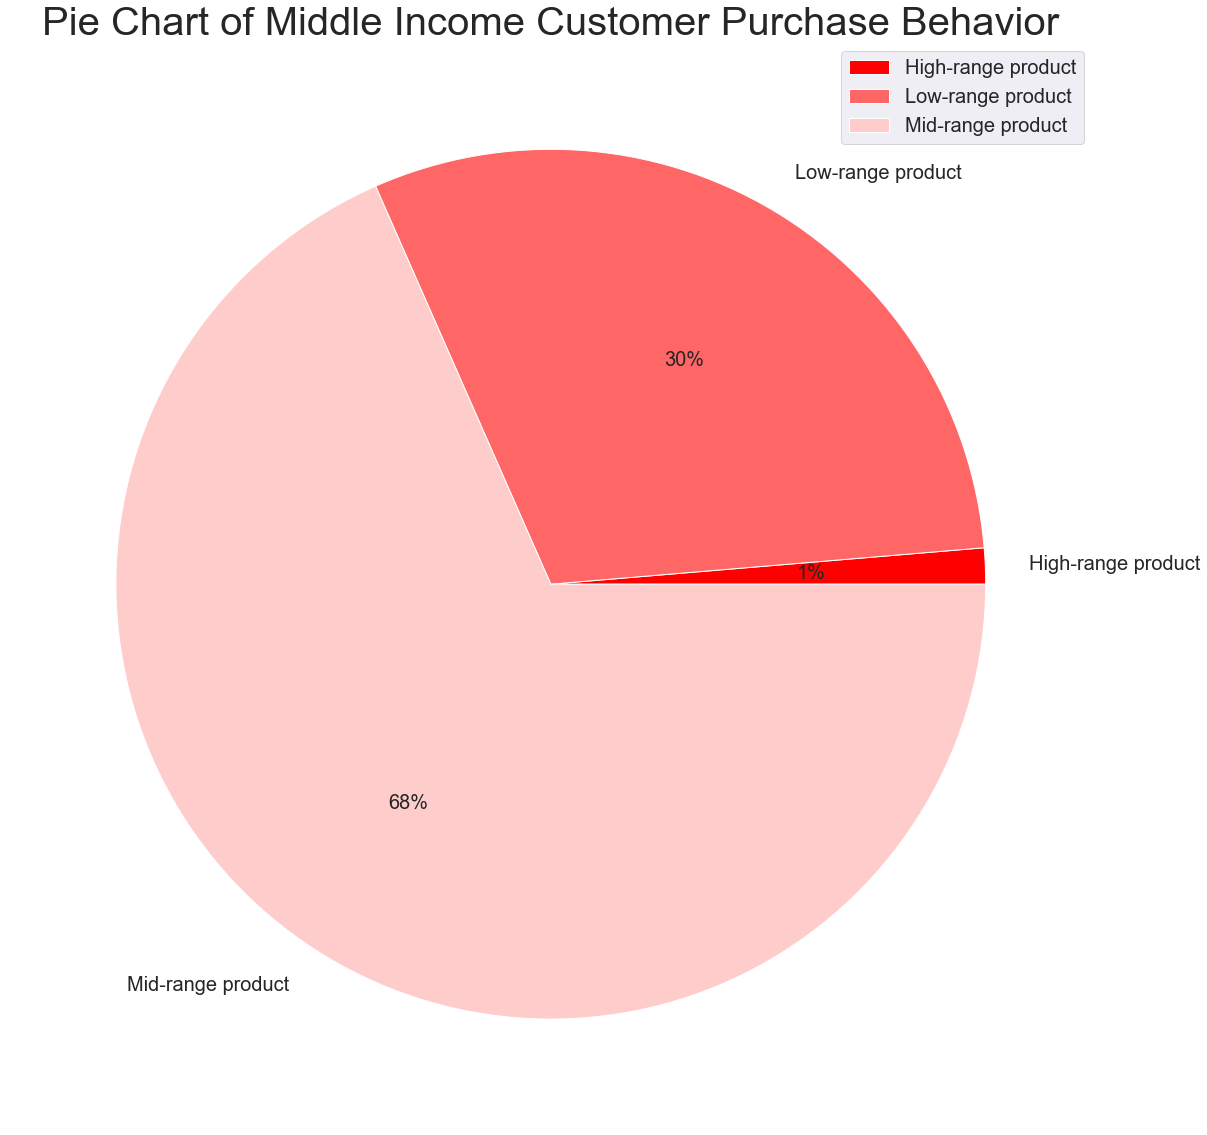

In [51]:
# Develop a pie chart to show the customer purchase behavior based on the range of the product
pie_middle_income_price_range=income_price_range['middle income'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Middle Income Customer Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_middle_income_price_range

<AxesSubplot:title={'center':'Pie Chart of Low Income Customer Purchase Behavior'}>

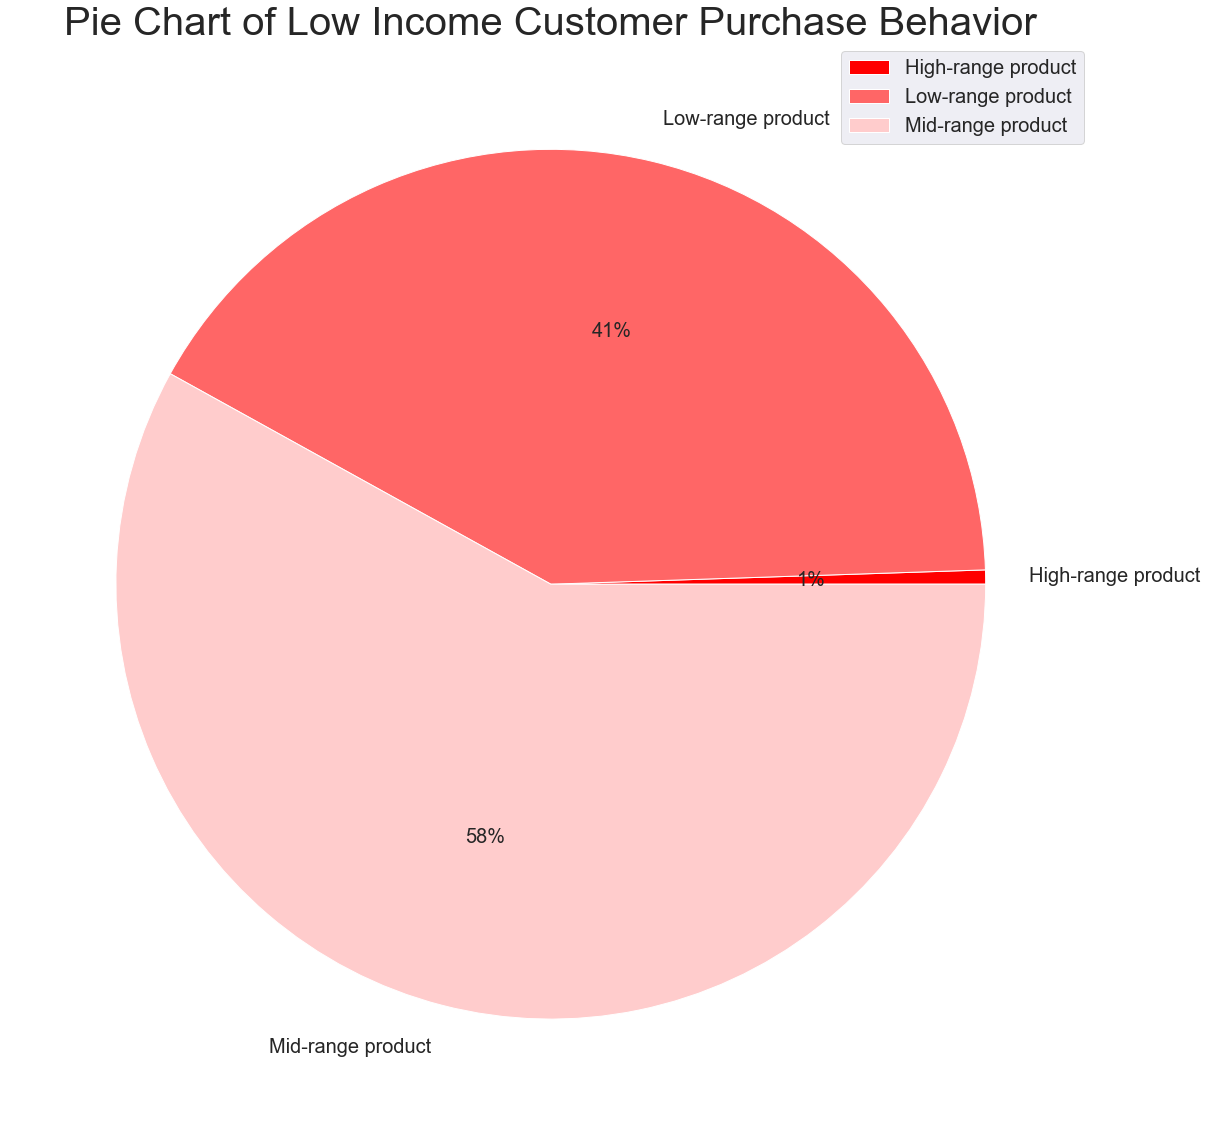

In [52]:
# Develop a pie chart to show the customer purchase behavior based on the range of the product
pie_low_income_price_range=income_price_range['low income'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Low Income Customer Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_low_income_price_range

In [53]:
# Find the spending habits among customers based on loyalty flag
df_merged_2.groupby(['loyalty_flag']).agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
loyalty_flag                         
Loyal customer    7.773544  1.0  25.0
New customer      7.801411  1.0  25.0
Regular customer  7.798229  1.0  25.0

In [54]:
# Find the order frequency among customers based on loyalty flag
loyalty_order_frequency = df_merged_2.groupby(['loyalty_flag']).agg({'median_days_since_last_order':['mean', 'min', 'max']})
loyalty_order_frequency

median_days_since_last_order                     
                                         mean       min        max
loyalty_flag                                                      
Loyal customer                       6.034182  0.288591  12.678112
New customer                        18.060392  0.000000  30.000000
Regular customer                    12.204707  0.518987  29.586207

In [55]:
#using cross-tab to understand the loyalty groups in each region
loyalty_region = pd.crosstab(df_merged_2['region'], df_merged_2['loyalty_flag'])
loyalty_region

loyalty_flag,Loyal customer,New customer,Regular customer
region,,,
midwest,2373854,1472054,3751105
northeast,1841833,1099783,2780851
south,3405949,2073404,5311859
west,2662760,1596125,4033580


In [56]:
# 100% stacked bar chart for loyalty customers distribution 
#creating crosstab for region and loyalty customer group

loyalty_region = pd.crosstab(index = df_merged_2['region'], columns = df_merged_2['loyalty_flag'], normalize="index")

#creating cross tab to display labels

loyalty_region_labels = pd.crosstab(index=df_merged_2['region'],columns=df_merged_2['loyalty_flag'])

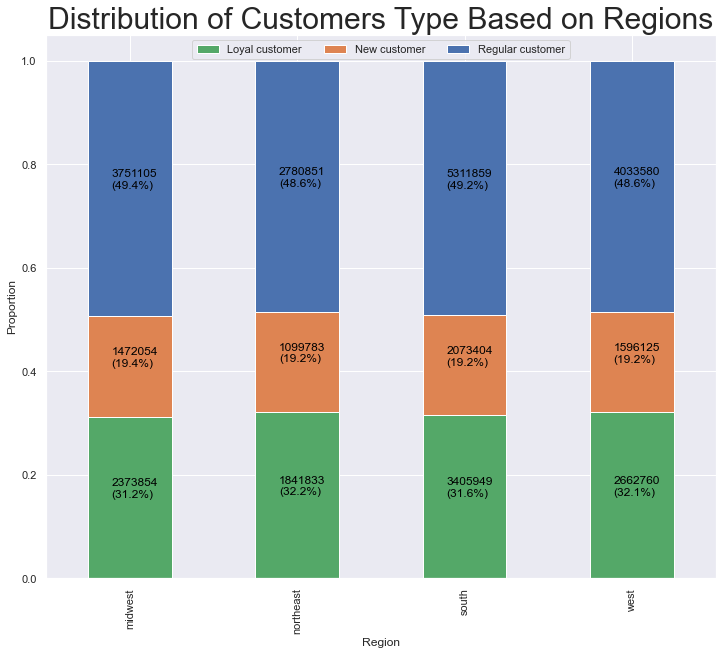

In [57]:
#plotting chart
loyalty_region_dist = loyalty_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.title('Distribution of Customers Type Based on Regions', fontsize=30)
plt.legend(loc="upper center", ncol=4)
plt.ylabel("Proportion")
plt.xlabel("Region")


for n, y in enumerate([*loyalty_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(loyalty_region.loc[y],
                                         loyalty_region_labels.loc[y],
                                          loyalty_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [58]:
#using cross-tab to understand the loyalty groups and price range of the product
price_range_loyalty = pd.crosstab(df_merged_2['price_range_loc'], df_merged_2['loyalty_flag'].sort_values(ascending=False))
price_range_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
price_range_loc,,,
High-range product,119936,85624,212090
Low-range product,3214701,1951744,4958888
Mid-range product,6949759,4203998,10706417


In [59]:
# 100% stacked bar chart for loyalty customers distribution 
# Creating crosstab for range of product and loyalty customer group

price_range_loyalty = pd.crosstab(index = df_merged_2['price_range_loc'], columns = df_merged_2['loyalty_flag'], normalize="index")

#creating cross tab to display labels

price_range_loyalty_labels = pd.crosstab(index=df_merged_2['price_range_loc'],columns=df_merged_2['loyalty_flag'])

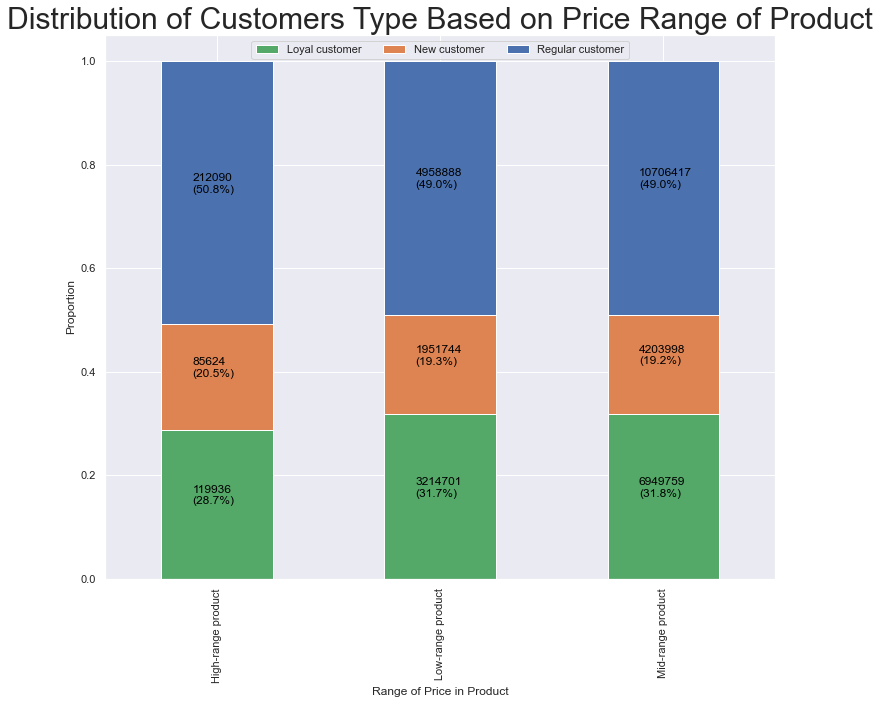

In [60]:
#plotting chart
price_range_loyalty_dist = price_range_loyalty.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.title('Distribution of Customers Type Based on Price Range of Product', fontsize=30)
plt.legend(loc="upper center", ncol=4)
plt.ylabel("Proportion")
plt.xlabel("Range of Price in Product")


for n, y in enumerate([*price_range_loyalty_labels.index.values]):
    for (proportion, count, x_loc) in zip(price_range_loyalty.loc[y],
                                         price_range_loyalty_labels.loc[y],
                                          price_range_loyalty.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [61]:
# using cross-tab to understand the region and price range of the product
price_range_region = pd.crosstab(df_merged_2['price_range_loc'], df_merged_2['region'].sort_values(ascending=False))
price_range_region

region,midwest,northeast,south,west
price_range_loc,,,,
High-range product,97905,73196,139386,107163
Low-range product,2372125,1792782,3367970,2592456
Mid-range product,5126983,3856489,7283856,5592846


In [62]:
# 100% stacked bar chart for range of products distribution 
# Creating crosstab for range of products and region

price_range_region = pd.crosstab(index = df_merged_2['region'], columns = df_merged_2['price_range_loc'], normalize="index")

#creating cross tab to display labels

price_range_region_labels = pd.crosstab(index=df_merged_2['region'],columns=df_merged_2['price_range_loc'])

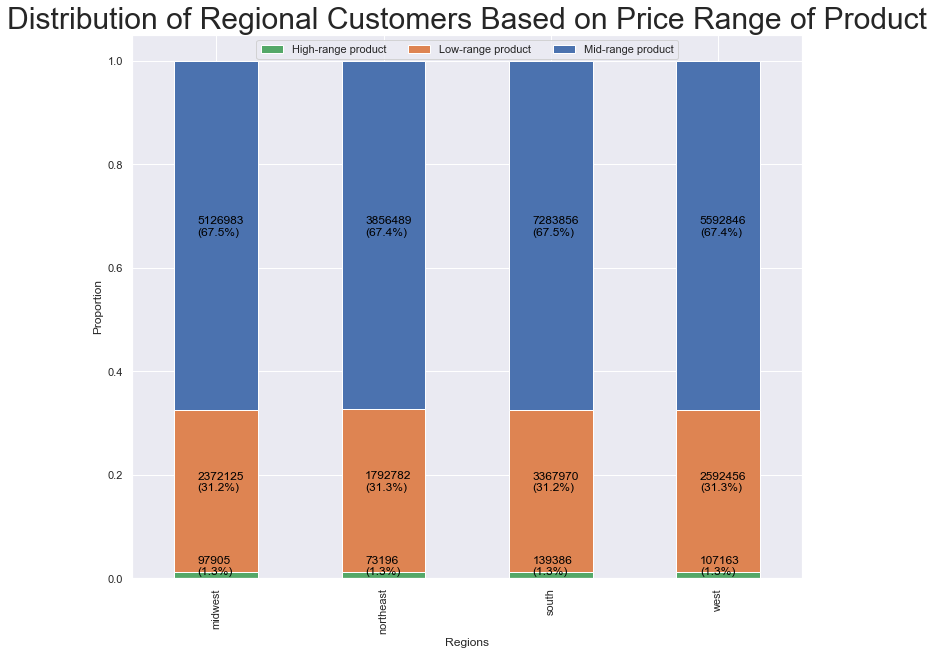

In [63]:
#plotting chart
price_range_region_dist = price_range_region.plot(kind='bar', 
                        stacked=True, 
                        color=['#54a868','#de8452','#4b72af'], 
                        figsize=(12,10))

plt.title('Distribution of Regional Customers Based on Price Range of Product', fontsize=30)
plt.legend(loc="upper center", ncol=4)
plt.ylabel("Proportion")
plt.xlabel("Regions")


for n, y in enumerate([*price_range_region_labels.index.values]):
    for (proportion, count, x_loc) in zip(price_range_region.loc[y],
                                         price_range_region_labels.loc[y],
                                          price_range_region.loc[y].cumsum()):
                
        plt.text(y=(x_loc - proportion) + (proportion / 2),
                 x=n - 0.11,
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                 color="black",
                 fontsize=12)

plt.show()

In [66]:
# creating subset with userid and loyalty columns
customer_loyalty=df_merged_2[['user_id','loyalty_flag']]
# removing duplicate values
customer_loyalty_unique=customer_loyalty.drop_duplicates()

In [67]:
customer_loyalty_unique['loyalty_flag'].value_counts()

New customer        111529
Regular customer     76864
Loyal customer       17017
Name: loyalty_flag, dtype: int64

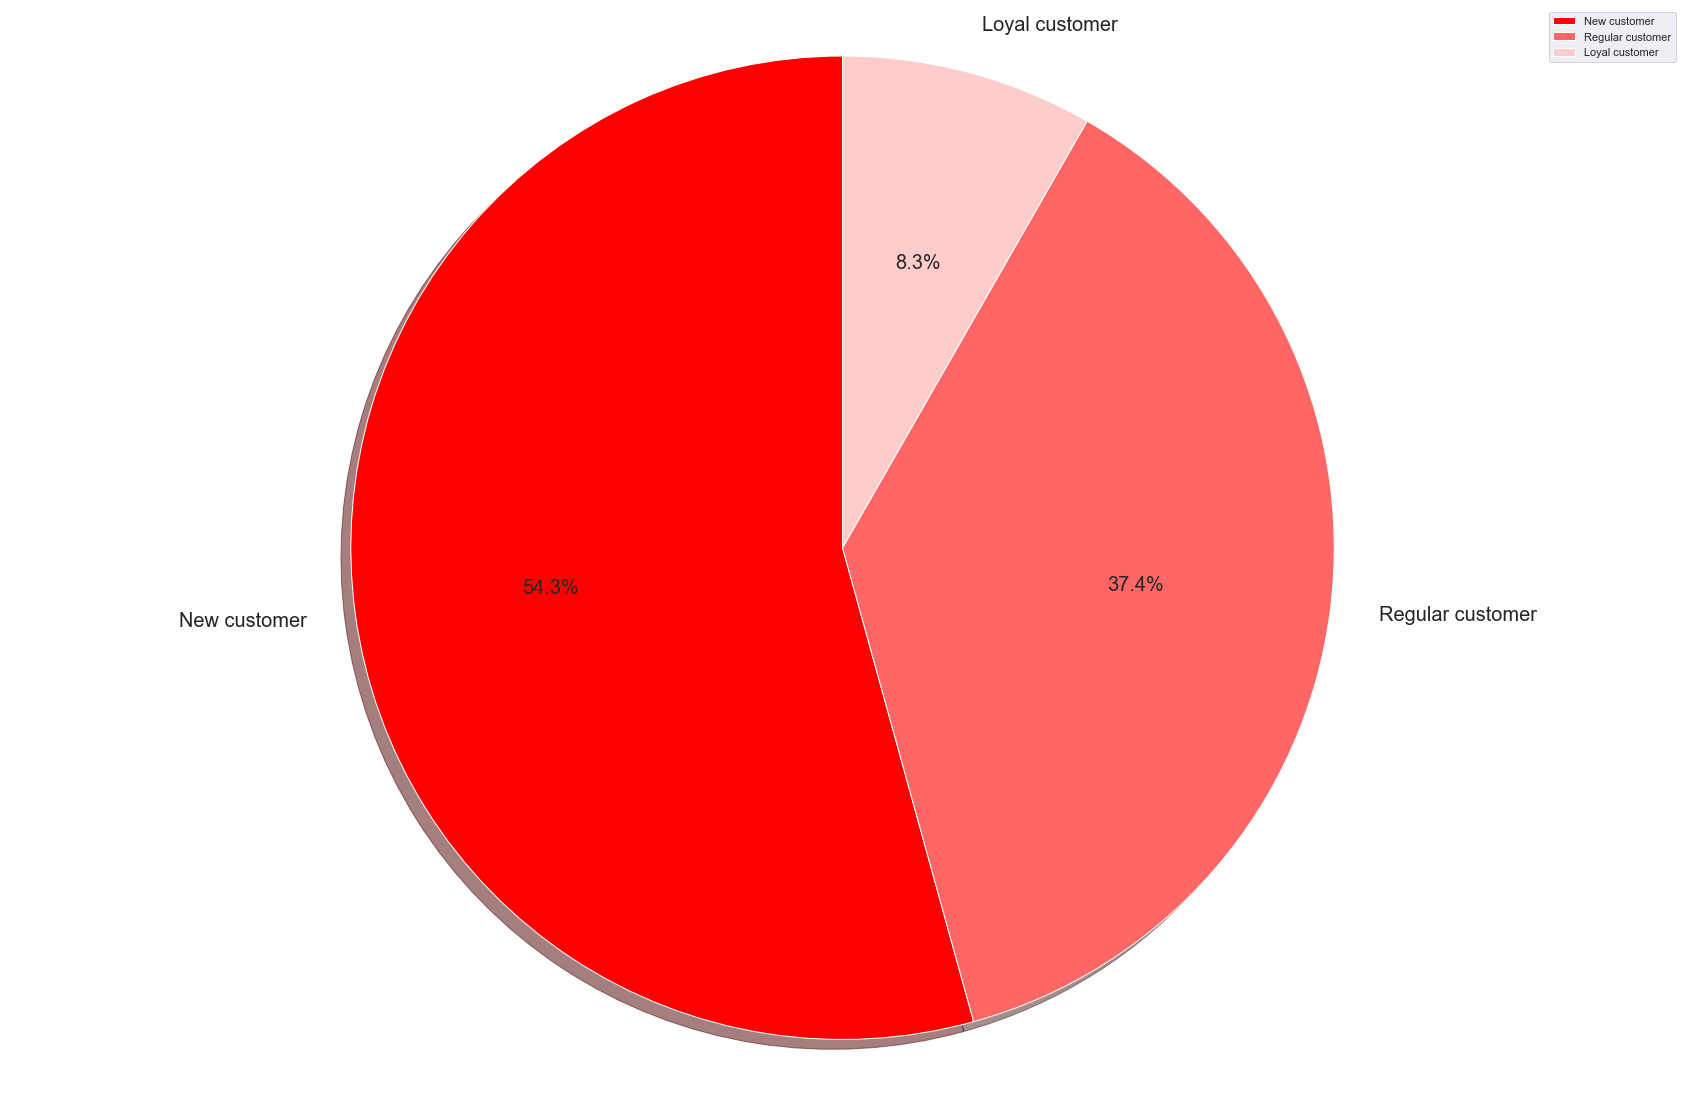

In [70]:
# pie chart for loyalty flag
labels = 'New customer', 'Regular customer', 'Loyal customer'
sizes = customer_loyalty_unique['loyalty_flag'].value_counts()
colors = ['#ff0000', '#ff6666','#ffcccc']
textprops = {"fontsize":20}

loyal, ax = plt.subplots()
ax.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops=textprops)
ax.axis('equal')  

plt.legend()
plt.show()


# 05. Export Visualisation

In [71]:
# Distribution of Customers Based on Age-Group Across U.S. Regions
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_age_region.png'))

In [72]:
# Distribution of Customers Based on Income-Group Across U.S. Regions
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_income_region.png'))

In [73]:
# Distribution of Customers Based on Dependants Across U.S. Regions
bar_dependants_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_dependants_region.png'))

In [74]:
# Number of Orders Based on Department
bar_department_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_department_orders.png'))

In [75]:
# Pie Chart of Royalty Customer Based on Age
pie_loyal_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_loyal_age.png'))

In [76]:
# Pie Chart of New Customer Based on Age
pie_new_customer_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_new_customer_age.png'))

In [77]:
# Pie Chart of Regular Customer Based on Age
pie_regular_customer_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_regular_customer_age.png'))

In [78]:
# Order Based on Hour of Day for Each Age Groups
linechart_income_order_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'linechart_income_order_time.png'))

In [79]:
# Order Based on Day of Week for Each Age Groups
linechart_age_order_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'linechart_age_order_week.png'))

In [80]:
# Pie Chart of Royalty Customer Based on Income
pie_loyal_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_loyal_income.png'))

In [81]:
# Pie Chart of New Customer Based on Income
pie_new_customer_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_new_customer_income.png'))

In [82]:
# Pie Chart of Regular Customer Based on Income
pie_regular_customer_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_regular_customer_income.png'))

In [83]:
# Order Based on Hour of Day for Each Income Groups
linechart_income_order_time.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'linechart_income_order_time.png'))

In [84]:
# Order Based on Day of Week for Each Income Groups
linechart_income_order_week.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'linechart_income_order_week.png'))

In [85]:
# Number of Products Based on Price
bar_price_rance_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'bar_price_rance_orders.png'))

In [86]:
# Pie Chart of Young Customer Purchase Behavior
pie_young_age_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_young_age_price_range.png'))

In [87]:
# Pie Chart of Middle Age Customer Purchase Behavior
pie_middle_age_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_middle_age_price_range.png'))

In [88]:
# Pie Chart of Older Customer Purchase Behavior
pie_older_age_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_older_age_price_range.png'))

In [89]:
# Pie Chart of High Income Customer Purchase Behavior
pie_high_income_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_high_income_price_range.png'))

In [90]:
# Pie Chart of Middle Income Customer Purchase Behavior
pie_middle_income_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_middle_income_price_range.png'))

In [91]:
# Pie Chart of Low Income Customer Purchase Behavior
pie_low_income_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_low_income_price_range.png'))

In [92]:
# Distribution of Customers Type Based on Regions
loyalty_region_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'loyalty_region_dist.png'))

In [93]:
# Distribution of Customers Type Based on Price Range of Product
price_range_loyalty_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'price_range_loyalty_dist.png'))

In [94]:
# Distribution of Regional Customers Based on Price Range of Product
price_range_region_dist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'price_range_region_dist.png'))

In [96]:
# Pie Chart for Loyal Customer
loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'customer_loyalty_unique.png'))

# 06. Additional Insights

In [97]:
#using cross-tab to understand the customer purchase behavior at each age group
dependant_price_range = pd.crosstab(df_merged_2['price_range_loc'], df_merged_2['dependant_group'].sort_values(ascending=False))
dependant_price_range

dependant_group,dependants,no dependants
price_range_loc,,
High-range product,315484,102166
Low-range product,7594255,2531078
Mid-range product,16396313,5463861


<AxesSubplot:title={'center':'Pie Chart of Family with Dependants Purchase Behavior'}>

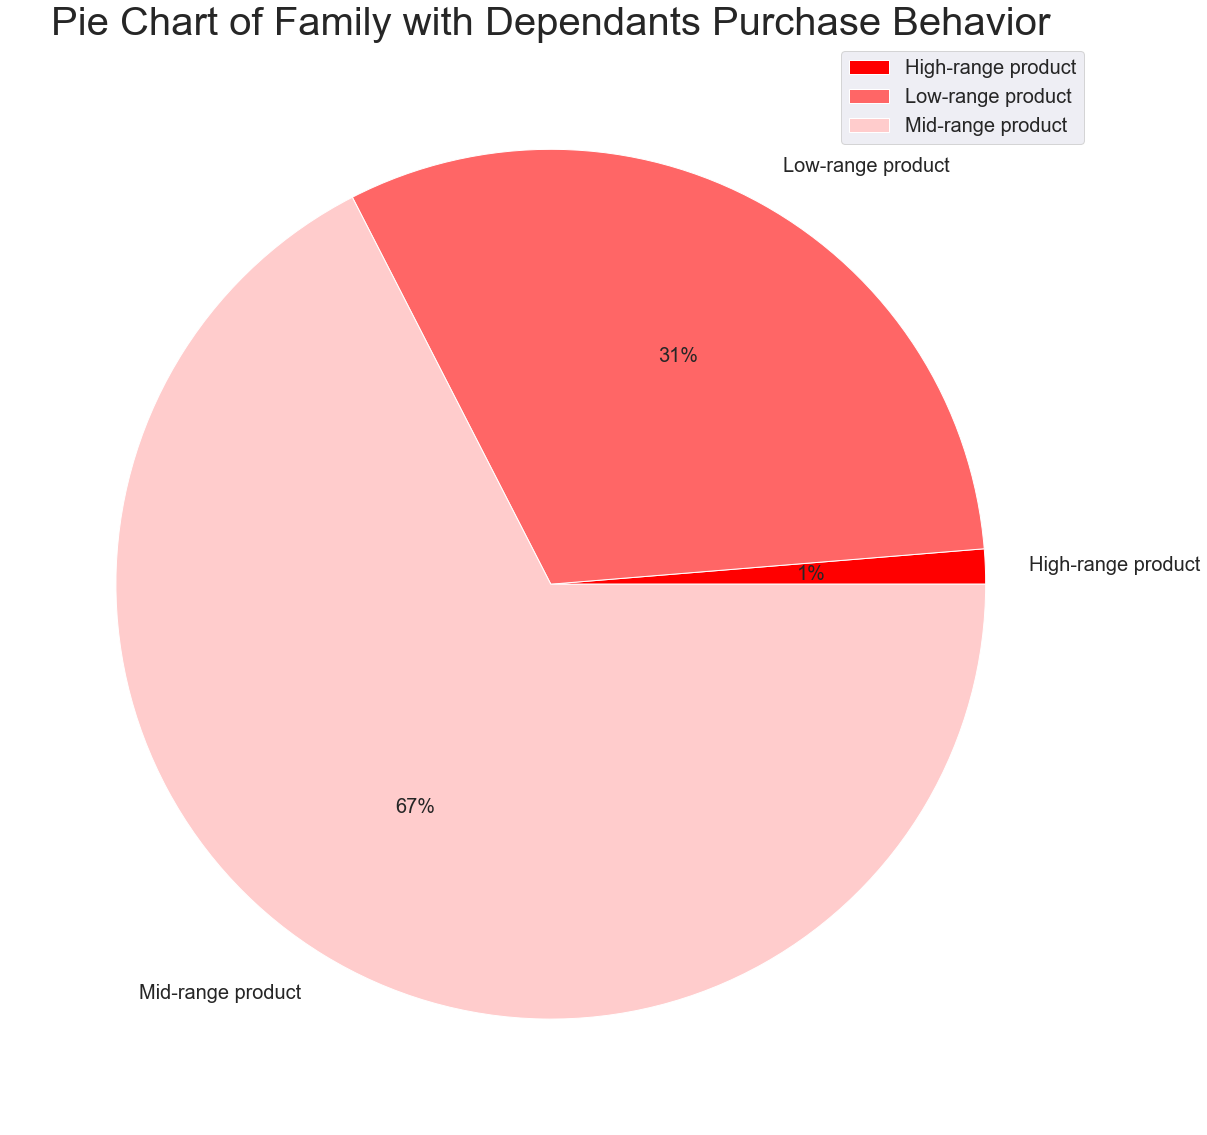

In [99]:
#Loyalty flag for loyalty customers based on dependants
pie_dependant_price_range=dependant_price_range['dependants'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Family with Dependants Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_dependant_price_range

<AxesSubplot:title={'center':'Pie Chart of Family with Dependants Purchase Behavior'}>

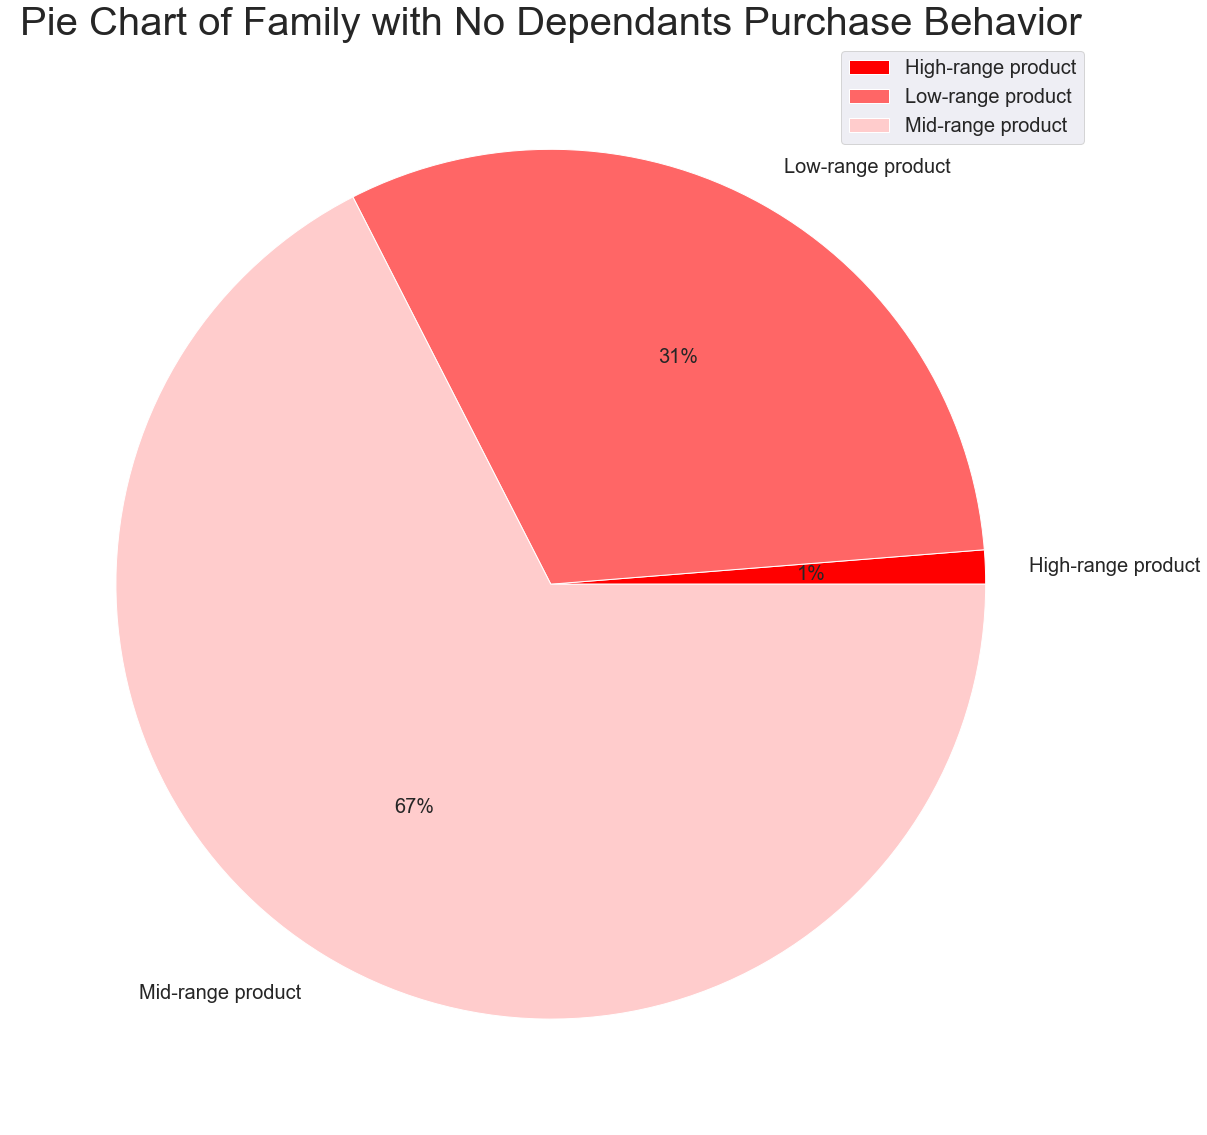

In [100]:
#Loyalty flag for loyalty customers based on dependants
pie_no_dependant_price_range=dependant_price_range['no dependants'].plot.pie(label='',autopct=('%1.f%%'), colors=['#ff0000', '#ff6666','#ffcccc'], textprops={'fontsize': 20})
plt.title('Pie Chart of Family with No Dependants Purchase Behavior', fontsize=40)
plt.legend(fontsize = 20)
pie_dependant_price_range

In [101]:
# Find the Order Time based on depandants
dependant_order_time = pd.crosstab(df_merged_2['order_hour_of_day'], df_merged_2['dependant_group'])
dependant_order_time

dependant_group,dependants,no dependants
order_hour_of_day,,
0,164591,54168
1,87351,28337
2,51799,17565
3,38263,13015
4,40497,12740
5,65903,22049
6,216991,73481
7,664055,226968
8,1286542,431483


In [102]:
# Find the Order Day per Week based on income group
dependant_order_week = pd.crosstab(df_merged_2['orders_day_of_week'], df_merged_2['dependant_group'])
dependant_order_week

dependant_group,dependants,no dependants
orders_day_of_week,,
0,4653727,1550255
1,4235222,1424697
2,3164519,1049079
3,2880995,959298
4,2838431,945164
5,3148424,1057075
6,3384734,1111537


In [103]:
#Renaming the day
dependant_order_week = dependant_order_week.rename(index={0:'Saturday', 1:'Sunday', 2:'Monday', 3:'Tuesday', 4:'Wednesday', 5:'Thursday', 6:'Friday'})
dependant_order_week

dependant_group,dependants,no dependants
orders_day_of_week,,
Saturday,4653727,1550255
Sunday,4235222,1424697
Monday,3164519,1049079
Tuesday,2880995,959298
Wednesday,2838431,945164
Thursday,3148424,1057075
Friday,3384734,1111537


In [104]:
# Pie Chart of Family with Dependant Purchase Behavior
pie_dependant_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_dependant_price_range.png'))

In [105]:
# Pie Chart of Family with No Dependant Purchase Behavior
pie_no_dependant_price_range.figure.savefig(os.path.join(path, '04 Analysis', 'Visualisations', 'pie_no_dependant_price_range.png'))

In [106]:
#using cross-tab to understand the customer purchase at department based on family status
dependant_department=pd.crosstab(df_merged_2['department'], df_merged_2['dependant_group'].sort_values(ascending=False))
dependant_department

dependant_group,dependants,no dependants
department,,
alcohol,114562,39115
babies,317300,106491
bakery,877969,294390
beverages,2013137,674247
breakfast,529186,174876
bulk,26294,8276
canned goods,803189,264824
dairy eggs,4049137,1349252
deli,786057,265136
